<h1><center><span style="color:#6b5b95">House Price Analysis using Regularization</span></center></h1>

# Business Problem 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

# Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

# Split Dataset
from sklearn.model_selection import train_test_split
# Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Importing RFE and LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Stats model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# R2 Score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Label Encoder for ordinal variable
from sklearn.preprocessing import LabelEncoder

# Data Sourcing 

In [2]:
# Load dataset 
master_df = pd.read_csv("train.csv",encoding='ISO-8859-1')
master_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
# Shape
master_df.shape

(1460, 81)

We have around 1460 records in our dataset and 81 features

In [4]:
# check check datatype and null values
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

## Null Values Analysis

In [5]:
# Lets create a re usuable function to check Null values percentage, numbers, and column type
def analyze_null(data):
    master_na = pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False),columns=['Percent'])
    master_na = master_na[master_na.Percent!=0]
    total = data[master_na.index].isnull().sum().sort_values(ascending=False)
    types = data[master_na.index].dtypes
    master_na = pd.concat([master_na,total,types],axis=1).rename({0:"total",1:"dtype"},axis=1)
    return master_na

In [6]:
# Lets analyse the null values by calling the function
analyze_null(master_df)

,Percent,total,dtype
PoolQC,99.52,1453,object
MiscFeature,96.30,1406,object
Alley,93.77,1369,object
Fence,80.75,1179,object
FireplaceQu,47.26,690,object
LotFrontage,17.74,259,float64
GarageCond,5.55,81,object
GarageType,5.55,81,object
GarageYrBlt,5.55,81,float64
GarageFinish,5.55,81,object


In [7]:
# impute missing values top5 most null valued features with No as given by Business
master_df.PoolQC.fillna("No",inplace=True)
master_df.MiscFeature.fillna("No",inplace=True)
master_df.Alley.fillna("No",inplace=True)
master_df.Fence.fillna("No",inplace=True)
master_df.FireplaceQu.fillna("No",inplace=True)

In [8]:
# lets drop Id as well since its a just unique id column¶
master_df = master_df.drop(['Id'],axis=1)
# Analyze NUll Values Again
analyze_null(master_df)

,Percent,total,dtype
LotFrontage,17.74,259,float64
GarageYrBlt,5.55,81,float64
GarageQual,5.55,81,object
GarageFinish,5.55,81,object
GarageCond,5.55,81,object
GarageType,5.55,81,object
BsmtExposure,2.60,38,object
BsmtFinType2,2.60,38,object
BsmtFinType1,2.53,37,object
BsmtQual,2.53,37,object


In [9]:
# Lets check Mean and Median of LotFrontage to impute missing values
master_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
# Since mean and median is close, lets replace null values with mean 
master_df['LotFrontage'].fillna(round(master_df.LotFrontage.mean(),6),inplace=True)
analyze_null(master_df)

,Percent,total,dtype
GarageYrBlt,5.55,81,float64
GarageCond,5.55,81,object
GarageFinish,5.55,81,object
GarageQual,5.55,81,object
GarageType,5.55,81,object
BsmtFinType2,2.60,38,object
BsmtExposure,2.60,38,object
BsmtCond,2.53,37,object
BsmtQual,2.53,37,object
BsmtFinType1,2.53,37,object


In [11]:
# impute missing values in Garage features with No as given by Business
master_df.GarageType.fillna("No",inplace=True)
master_df.GarageYrBlt.fillna(0,inplace=True)
master_df.GarageCond.fillna("No",inplace=True)
master_df.GarageQual.fillna("No",inplace=True)
master_df.GarageFinish.fillna("No",inplace=True)
analyze_null(master_df)

,Percent,total,dtype
BsmtFinType2,2.60,38,object
BsmtExposure,2.60,38,object
BsmtQual,2.53,37,object
BsmtFinType1,2.53,37,object
BsmtCond,2.53,37,object
MasVnrType,0.55,8,object
MasVnrArea,0.55,8,float64
Electrical,0.07,1,object


In [12]:
# Impute Missing values in Basement Features
master_df.BsmtFinType2.fillna("No_basement",inplace=True)
master_df.BsmtExposure.fillna("No_basement",inplace=True)
master_df.BsmtQual.fillna("No_basement",inplace=True)
master_df.BsmtFinType1.fillna("No_basement",inplace=True)
master_df.BsmtCond.fillna("No_basement",inplace=True)
analyze_null(master_df)

,Percent,total,dtype
MasVnrType,0.55,8,object
MasVnrArea,0.55,8,float64
Electrical,0.07,1,object


In [13]:
# Lets check the values in MasVnrType
master_df.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [14]:
# Lets Impute MasVnrType with Mode which is None
master_df.MasVnrType.fillna("None",inplace=True)

In [15]:
# Lets check the mean and median in MasVnrArea to impute missing values
master_df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [16]:
# Since median and mean are not close, and also there may not be Veneer Area in the house, hence lets impute with median which 0.00 
master_df.MasVnrArea.fillna(0.00,inplace=True)

In [17]:
# Lets check the values in Electrical Feature
master_df.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [18]:
# lets impute with most common values SBrkr 
master_df.Electrical.fillna("SBrkr",inplace=True)
analyze_null(master_df)

,Percent,total,dtype


<div class="alert alert-block alert-success"> As we can see above, We have removed all the null values from our dataset</div>

### Check for Uniqueness in dataset

In [19]:
# Lets check the columns where there is no variation at all and all rows have same values
master_df.columns[master_df.nunique()==1]

Index([], dtype='object')

<div class="alert alert-block alert-success"> We can see that there are no variables which are unique throughout the dataset</div>

# Data Understanding

### Splitting into categorical, date and numerical

In [20]:
# Lets check the data to identify the Categorical variables which are numeric
master_df.select_dtypes(exclude=object)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [21]:
# Add all the numeric type of columns which are actually categorical to categorical variables list
categorical_variables = ['MSSubClass','OverallQual', 'OverallCond'] + master_df.select_dtypes(include=object).columns.to_list()
# Add all the date type of columns to date variables
date_variables = ['YrSold','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt',]
# Add remaining numeric type of columns to numerical variables
numerical_variables = [i for i in master_df.columns.to_list() if i not in categorical_variables+date_variables ]

In [22]:
# Lets check the categorical columns again
master_df[categorical_variables].head()

,MSSubClass,OverallQual,OverallCond,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,7,5,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,20,6,8,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,60,7,5,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,70,7,5,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,60,8,5,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


In [23]:
# Lets check the date columns again
master_df[date_variables].head()

,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,2008,2,2003,2003,2003.0
1,2007,5,1976,1976,1976.0
2,2008,9,2001,2002,2001.0
3,2006,2,1915,1970,1998.0
4,2008,12,2000,2000,2000.0


In [24]:
# Check if all columns covered in 3 Lists
def check_cols_covered():
    return len(categorical_variables + date_variables + numerical_variables) == master_df.shape[1]
check_cols_covered()

True

## Continuous Variable Analysis

In [25]:
# Check numeric data
master_df[numerical_variables].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000


### Correlation 

In [26]:
# Prepare Correlation Matrix
corr_matrix = master_df[numerical_variables+date_variables].corr().abs()
corr_matrix

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
LotFrontage,1.000000,0.306795,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,0.006419,0.180424,0.048258,0.237023,0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,0.006768,0.010158,0.117598,0.082746,0.100259
LotArea,0.306795,1.000000,0.103321,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.014261,0.001205,0.014228,0.013788,0.072599
MasVnrArea,0.178699,0.103321,1.000000,0.261256,0.071330,0.113862,0.360067,0.339850,0.173800,0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,0.109907,0.019144,0.062248,0.011928,0.029512,0.472614,0.008317,0.006723,0.311600,0.176529,0.132696
BsmtFinSF1,0.215828,0.214103,0.261256,1.000000,0.050117,0.495251,0.522396,0.445863,0.137079,0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,0.107355,0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.014359,0.015727,0.249503,0.128451,0.115843
BsmtFinSF2,0.043340,0.111170,0.071330,0.050117,1.000000,0.209294,0.104810,0.097117,0.099260,0.014807,0.009640,0.158678,0.070948,0.076444,0.032148,0.015728,0.040751,0.035227,0.046921,0.038264,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.011378,0.031706,0.015211,0.049107,0.067759,0.035070
BsmtUnfSF,0.122156,0.002618,0.113862,0.495251,0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.422900,0.095804,0.288886,0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,0.005316,0.129005,0.002538,0.020764,0.012579,0.035092,0.023837,0.214479,0.041258,0.034888,0.149040,0.181133,0.042720
TotalBsmtSF,0.363358,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,0.174512,0.033245,0.454868,0.307351,0.000315,0.323722,0.048804,0.050450,0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.095478,0.037384,0.084489,0.126053,0.018479,0.613581,0.014969,0.013196,0.391452,0.291066,0.176359
1stFlrSF,0.414266,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,0.202646,0.014241,0.566024,0.244671,0.001956,0.380637,0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.065292,0.056104,0.088758,0.131525,0.021096,0.605852,0.013604,0.031372,0.281986,0.240379,0.166642
2ndFlrSF,0.072483,0.050986,0.173800,0.137079,0.099260,0.004469,0.174512,0.202646,1.000000,0.063353,0.687501,0.169494,0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,0.024358,0.040606,0.081487,0.016197,0.319334,0.028700,0.035164,0.010308,0.140024,0.064402
LowQualFinSF,0.036849,0.004779,0.068628,0.064503,0.014807,0.028167,0.033245,0.014241,0.063353,1.000000,0.134683,0.047143,0.005842,0.000710,0.027080,0.105607,0.007522,0.131185,0.021272,0.094480,0.067601,0.025444,0.018251,0.061081,0.004296,0.026799,0.062157,0.003793,0.025606,0.028921,0.022174,0.183784,0.062419,0.146467


### Heatmap of correlation Matrix

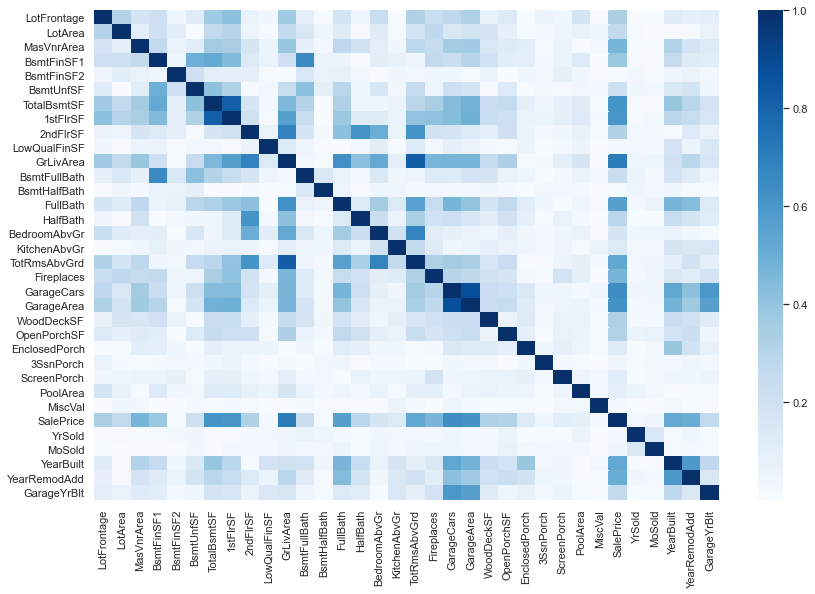

In [27]:
# Plot Heatmap of Correlation matrix
plt.figure(figsize=[14,9])
sns.heatmap(corr_matrix,cmap='Blues')
plt.show()

### Top highly correlated variables with Sale Price

In [28]:
# Sort Correlation values of variable wrt Sale Price
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

### Top highly correlated variables

In [29]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.9
high_corr_variables = [column for column in upper.columns if any(upper[column] >= 0.9) and column!='SalePrice']
high_corr_variables

[]

### Observation 
- Our Target Variable SalePrice has high correlation with GrLivArea, GarageCars, GarageArea, TotalBsmtSF etc.
- There are no highly correlated having values more than 0.9. Hence lets not remove them right now

### Scatter Plot to check relation with Target

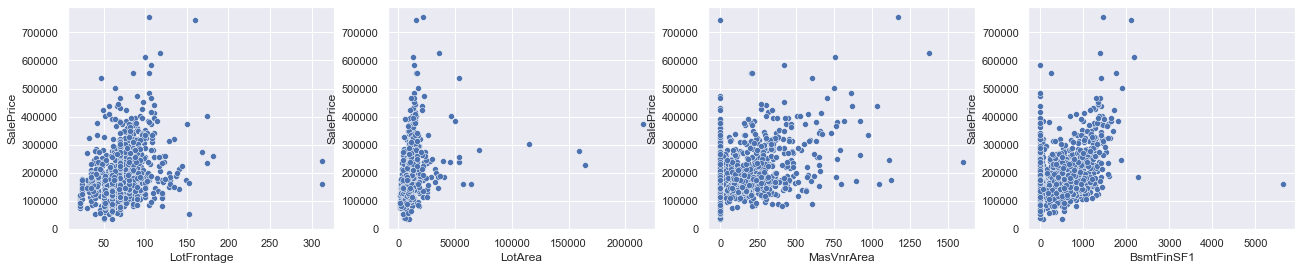

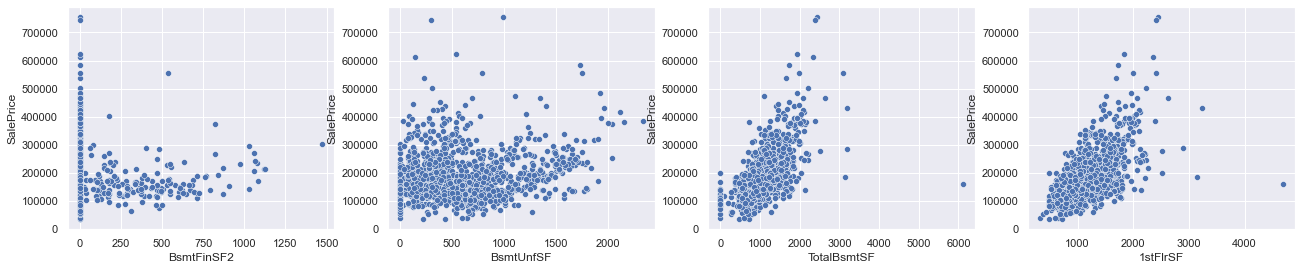

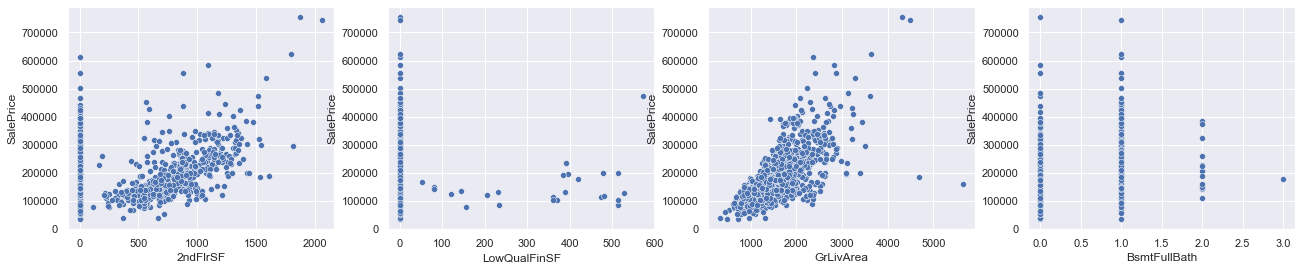

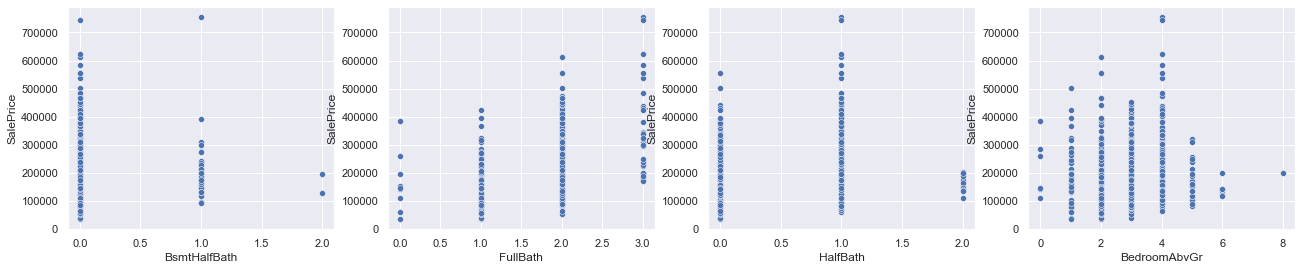

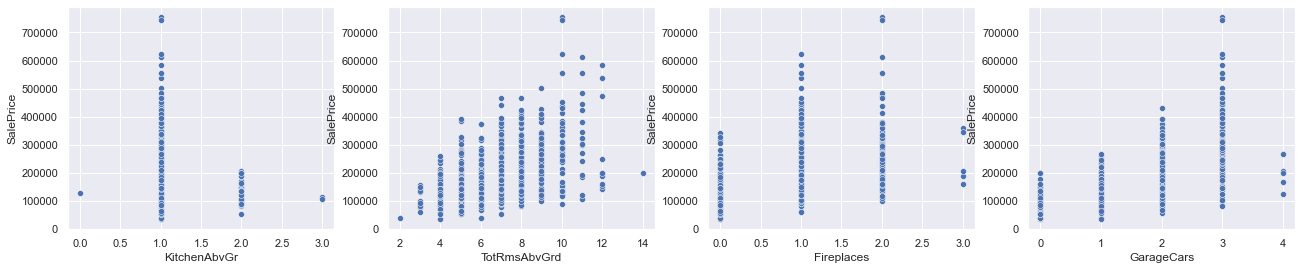

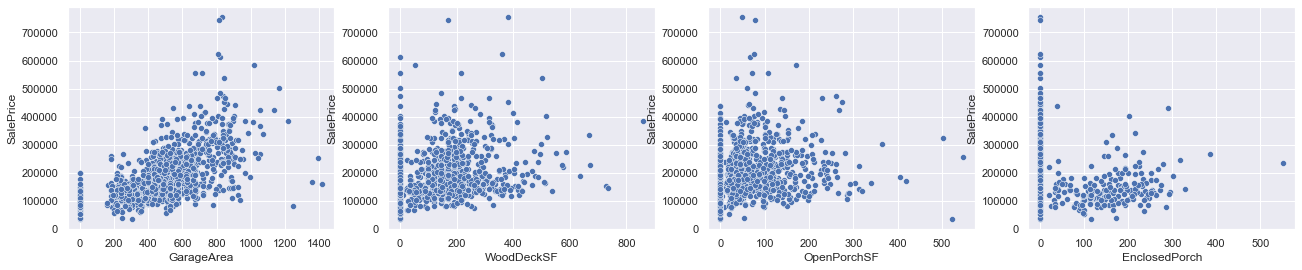

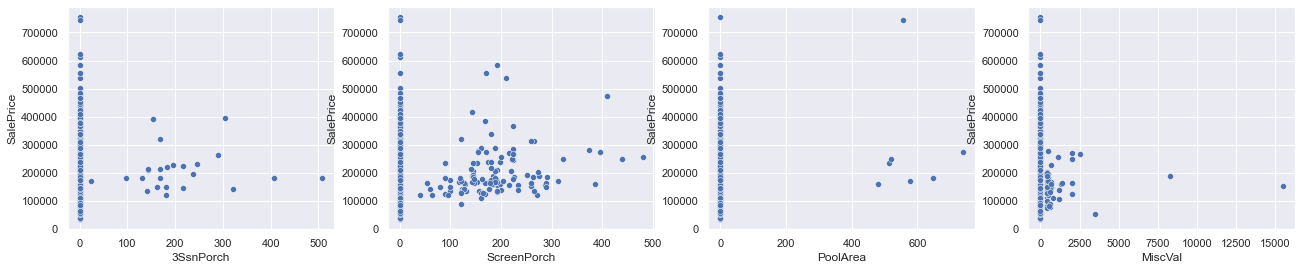

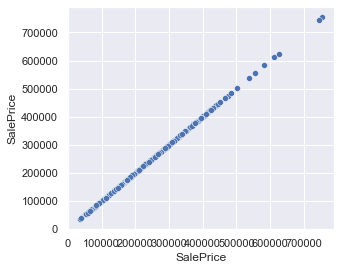

In [30]:
# Lets check if there is relation between different numeric variables and Sale Price
chunk_size = 4
for i in range(0, len(numerical_variables), chunk_size):  
    cat = numerical_variables[i:i + chunk_size]
    plt.figure(figsize=(22, 9))
    for j in range(0,len(cat)):   
        plt.subplot(2,4,j+1)
        data = master_df[cat[j]]
        sns.scatterplot(data=master_df,x=cat[j],y='SalePrice')
    plt.show()

### Observation 
- As we can see from the scatter plots that some of the variables follow linear relationship with Sale Price like GrLivArea, 1stFlrSF,2ndFlrSF, TotalBsmtS
- We also see some outliers in many variables
- Also some of the variables have discrete values, hence needs to be moved to categorical variables for better analysis

#### Move the discrete numeric variables to Categorical Variables

In [31]:
# Move the discrete variables to  categorical_variables
categorical_variables.extend(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars'])
# Remove them from numerical_variables
numerical_variables = [i for i in numerical_variables if i not in categorical_variables]
# Lets check if all variables are covered
check_cols_covered()

True

### Distribution of variables 

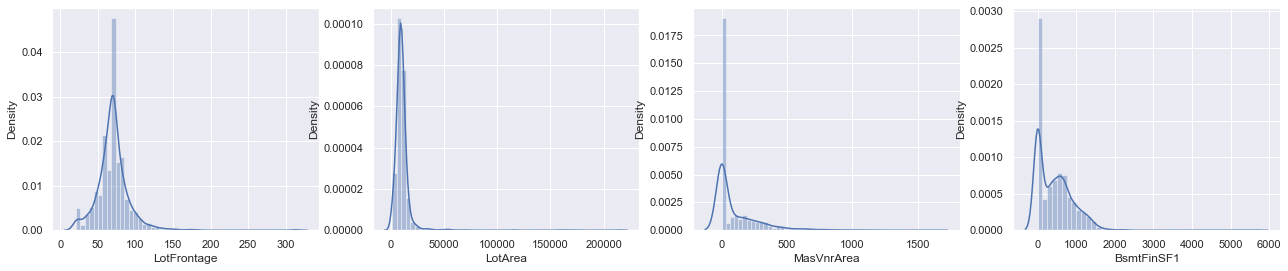

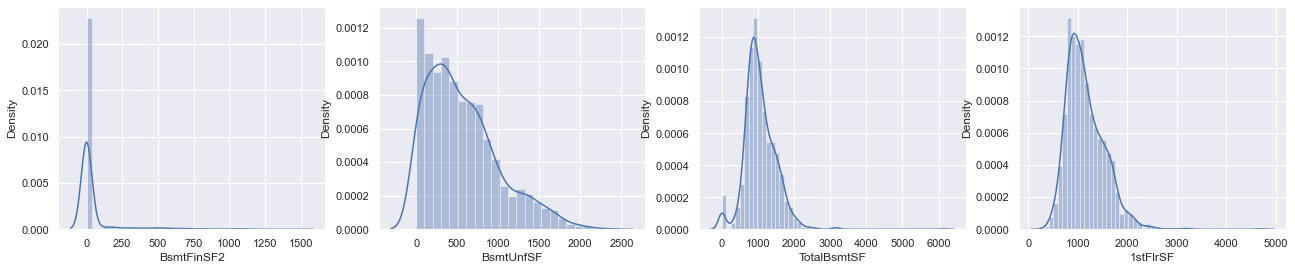

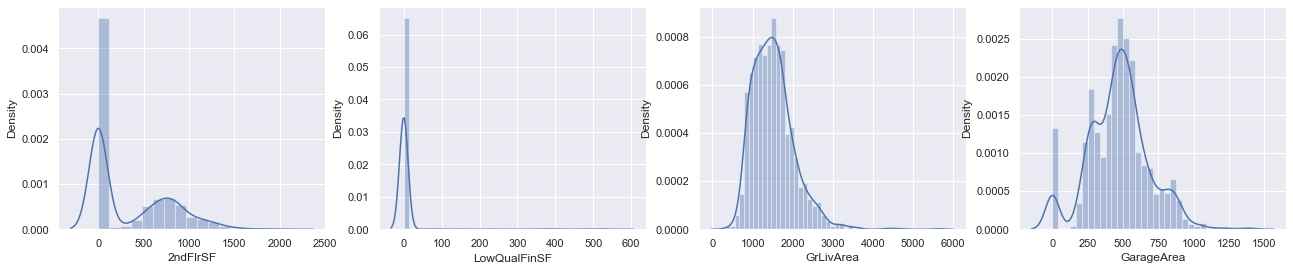

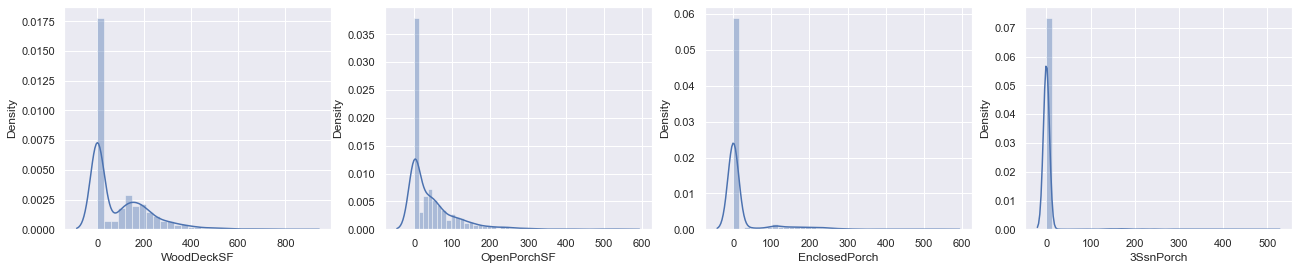

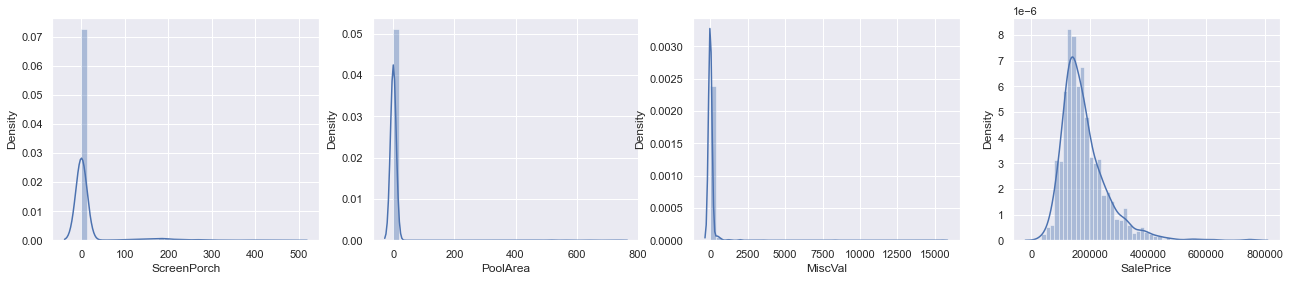

In [32]:
chunk_size = 4
for i in range(0, len(numerical_variables), chunk_size):  
    cat = numerical_variables[i:i + chunk_size]
    plt.figure(figsize=(22, 9))
    for j in range(0,len(cat)):   
        plt.subplot(2,4,j+1)
        data = master_df[cat[j]]
        sns.distplot(data)
    plt.show()

### Observation
- We see that many variables are skewed and many outliers are present.
- Also some of the variables do not follow normal distribution 
- Hence we may need to apply some transformation on the variables to make them normal

## Transformation 
Lets apply Log transformation to correct skewness

In [33]:
# Lets prepare a function which perform log tranformation and return it
def log_tranform(data):
    # If the values are negative
    if any(data<0):
        data = (data-data.min()+1) .transform(np.log)
    # If the values are Positive or zeroes
    else:
        data = (data+1).transform(np.log)
    return data

In [34]:
# Log transform all numeric variables
for i in numerical_variables:
    master_df[i] = log_tranform(master_df[i])

In [35]:
master_df[numerical_variables].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,12.247699
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,12.109016
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,12.317171
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,11.849405
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12.429220


### Distribution of variables after Tranformation

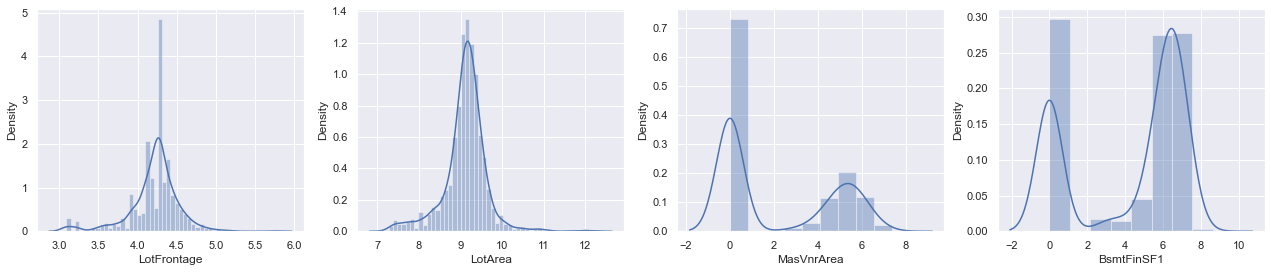

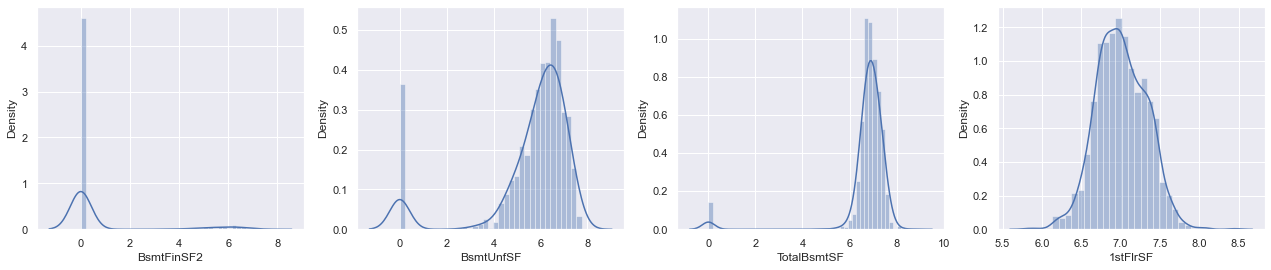

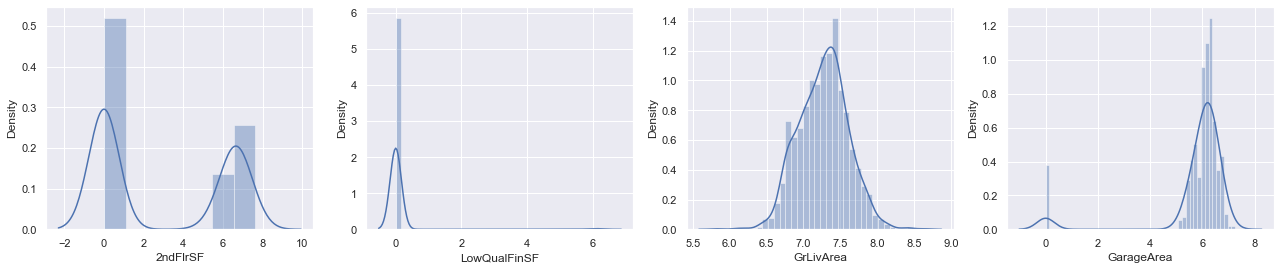

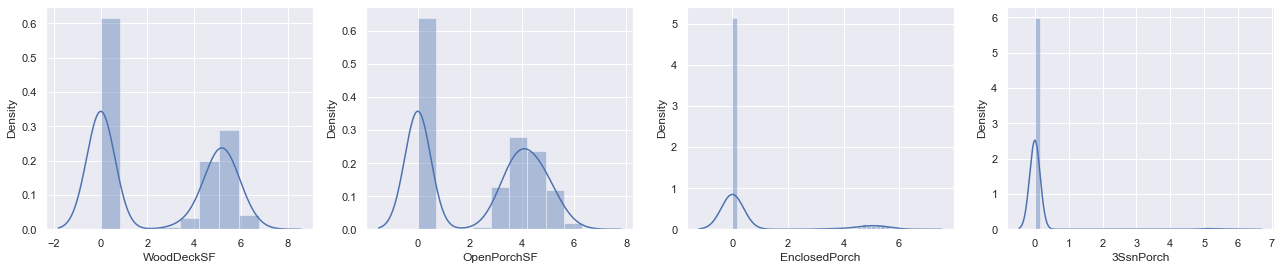

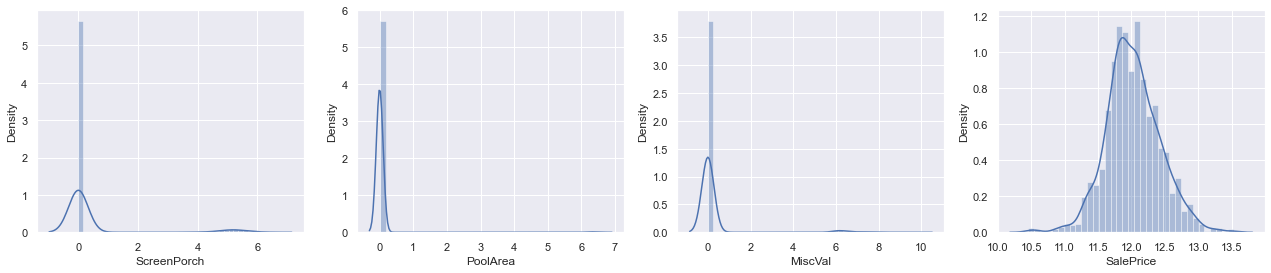

In [36]:
chunk_size = 4
for i in range(0, len(numerical_variables), chunk_size):  
    cat = numerical_variables[i:i + chunk_size]
    #print(cat)
    plt.figure(figsize=(22, 9))
    for j in range(0,len(cat)):   
        plt.subplot(2,4,j+1)
        data = master_df[cat[j]]
        sns.distplot(master_df[cat[j]])
    plt.show()

### Observation 
- We can see all the variables are normally distributed after transformation

## Feature Importance
Lets check Feature importance of few variables which are more concentrated towards zeroes like 'ScreenPorch','3SsnPorch','PoolArea','EnclosedPorch','MiscVal'

In [37]:
# Value Counts first of these variables
for i in ['ScreenPorch','3SsnPorch','PoolArea','EnclosedPorch','MiscVal']:
    print(round(master_df[i].value_counts(normalize=True).head()*100,1))

0.000000    92.1
5.262690     0.4
5.416100     0.3
4.795791     0.3
5.198497     0.3
Name: ScreenPorch, dtype: float64
0.000000    98.4
5.129899     0.2
5.379897     0.1
4.976734     0.1
5.198497     0.1
Name: 3SsnPorch, dtype: float64
0.000000    99.5
6.253829     0.1
6.475433     0.1
6.320768     0.1
6.357842     0.1
Name: PoolArea, dtype: float64
0.000000    85.8
4.727388     1.0
4.574711     0.4
5.262690     0.3
4.795791     0.3
Name: EnclosedPorch, dtype: float64
0.000000    96.4
5.993961     0.8
6.216606     0.5
6.552508     0.3
7.601402     0.3
Name: MiscVal, dtype: float64


### Observation
- We can see that 'ScreenPorch','3SsnPorch','PoolArea','EnclosedPorch','MiscVal' have more than 86% values as zeroes and does not have an linear relationship with target variable
- Before we remove, lets check the feature importance

In [38]:
# Lets Define function to give coeff value of a feature passed to function by creating a raw model(LR)
def feature_importance(X,y):
    # define the model
    model = LinearRegression()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.coef_
    # summarize feature importance
    imp_feat = pd.DataFrame({"feature name":X.columns,"score":np.abs(importance)})
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    return imp_feat.sort_values(by="score",ascending=True)

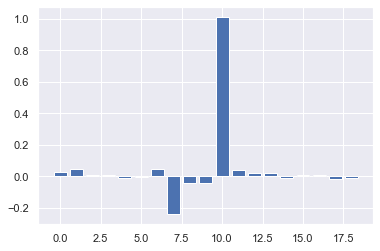

,feature name,score
10,GrLivArea,1.013242
7,1stFlrSF,0.241809
6,TotalBsmtSF,0.045855
1,LotArea,0.045117
8,2ndFlrSF,0.043314
9,LowQualFinSF,0.041314
11,GarageArea,0.040913
0,LotFrontage,0.026614
13,OpenPorchSF,0.024018
12,WoodDeckSF,0.018171


In [39]:
# Check Feature Importance all Numeric Variables
feature_importance(master_df[[i for i in numerical_variables if i != 'SalePrice']],master_df.SalePrice).sort_values(by='score',ascending=False)

### Observation
Since 'ScreenPorch','3SsnPorch','PoolArea','EnclosedPorch','MiscVal' have very low score of coeff which means they are not important, lets remove it

In [40]:
# Drop Variables from Dataset
master_df.drop(['ScreenPorch','3SsnPorch','PoolArea','EnclosedPorch','MiscVal'],axis=1,inplace=True)

In [41]:
# Remove from numeric variables
numerical_variables.remove('ScreenPorch')
numerical_variables.remove('3SsnPorch')
numerical_variables.remove('PoolArea')
numerical_variables.remove('EnclosedPorch')
numerical_variables.remove('MiscVal')
check_cols_covered()

True

## Outlier Analysis

In [42]:
# Lets compare the mean and median of numeric variables
master_df[numerical_variables].describe(percentiles=[.5]).loc[['mean','50%'],]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
mean,4.217092,9.110966,2.120264,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,0.099814,7.268512,5.808156,2.457206,2.308541,12.024057
50%,4.263383,9.156887,0.000000,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,0.000000,7.289611,6.175867,0.000000,3.258097,12.001512


### Boxplot to check Outliers

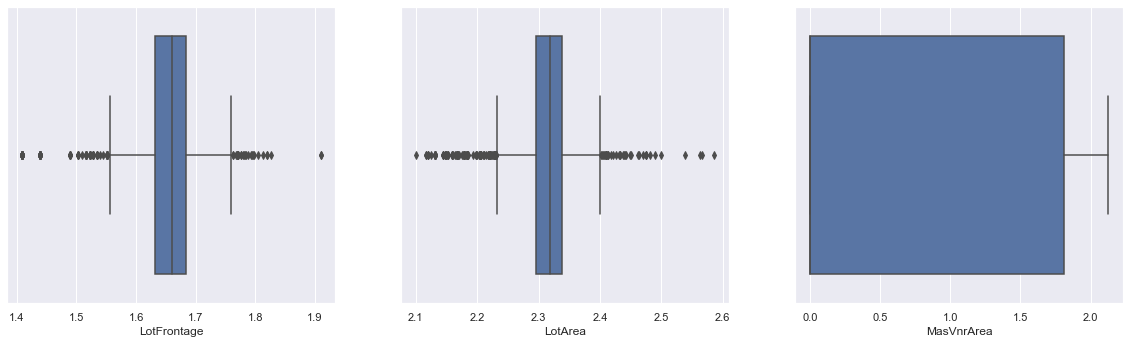

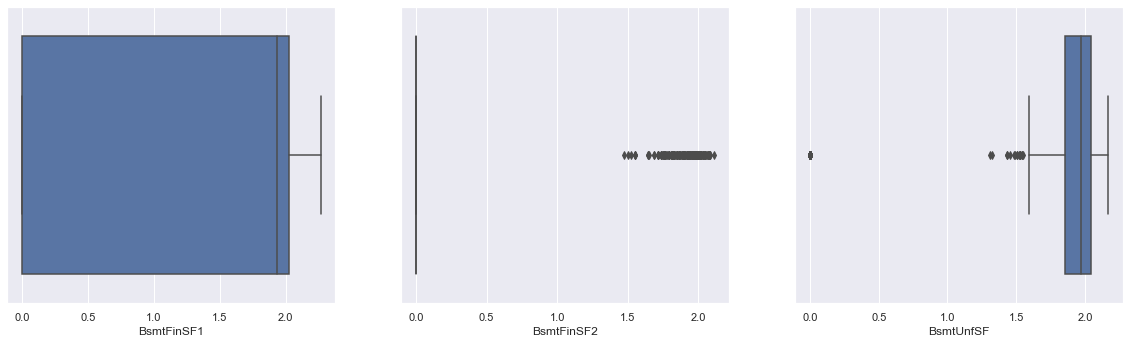

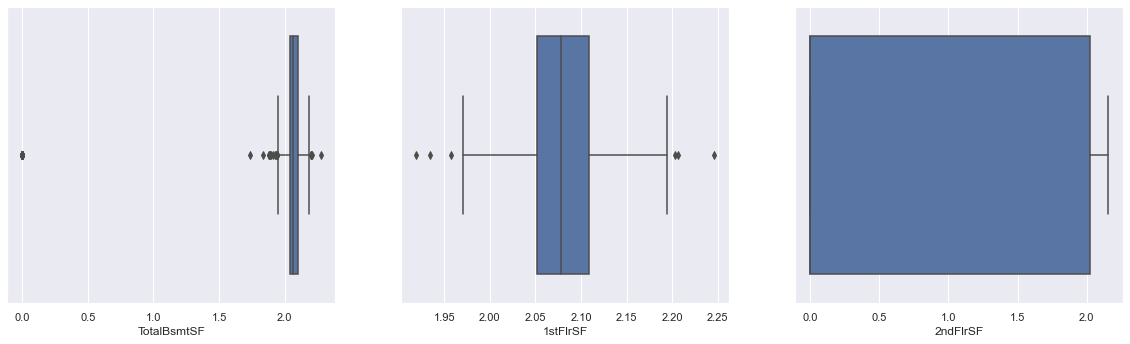

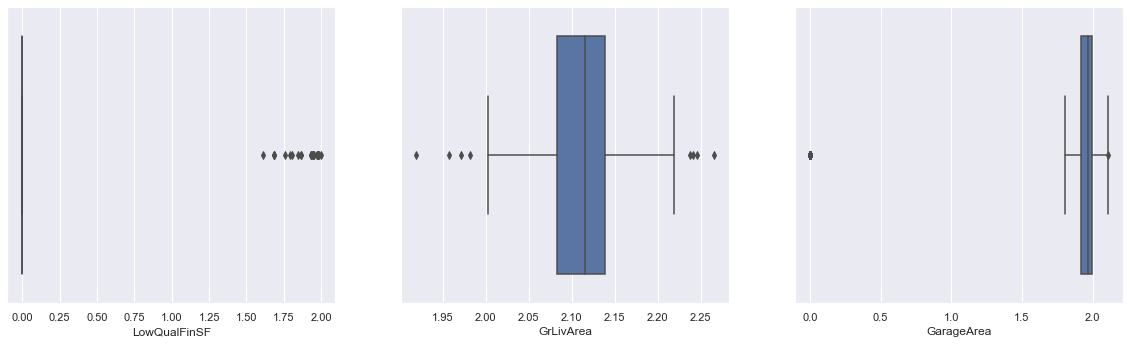

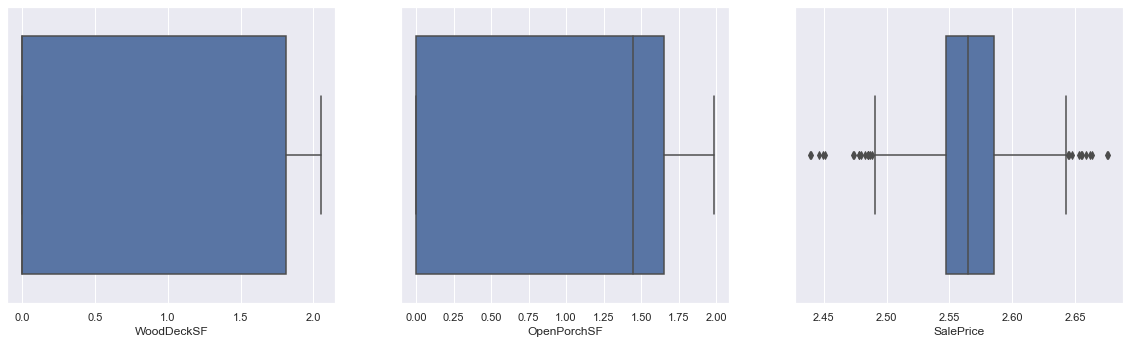

In [43]:
# Plot Box Plot for each numerical variables
chunk_size = 3
for i in range(0, len(numerical_variables), chunk_size):  
    cat = numerical_variables[i:i + chunk_size]
    plt.figure(figsize=(20, 12))
    for j in range(0,len(cat)):   
        plt.subplot(2,3,j+1)
        data = log_tranform(master_df[cat[j]])
        sns.boxplot(data)
    plt.show()

### Identify Outliers considering IQR Method with 25th and 75th percentile
Lets identify how many variables we will be removing with 25-75 Percentile

In [44]:
num_out_li = []
for i in numerical_variables:
    data = master_df[i]
    q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q3 - q1
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    num_out_li.append(len(outliers))
print(num_out_li)
print("pc",sum(num_out_li),"/",master_df.shape[0],sum(num_out_li)/master_df.shape[0]*100,"%")

[123, 132, 0, 0, 167, 125, 52, 7, 0, 26, 10, 84, 0, 0, 28]
pc 754 / 1460 51.64383561643836 %


### Identify Outliers considering IQR Method with 10th and 90th percentile
Lets identify how many variables we will be removing with 10-90 Percentile

In [45]:
num_out_li = []
for i in numerical_variables:
    print(i)
    data = master_df[i]
    q1, q3 = np.percentile(data, 10), np.percentile(data, 90)
    iqr = q3 - q1
    print('Percentiles: 10th=%.3f, 90th=%.3f, IQR=%.3f' % (q1, q3, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    num_out_li.append(len(outliers))
    print("****"*5)
print(num_out_li)
print("pc",sum(num_out_li),"/",master_df.shape[0],sum(num_out_li)/master_df.shape[0]*100,"%")

LotFrontage
Percentiles: 10th=3.912, 90th=4.533, IQR=0.621
Identified outliers: 2
********************
LotArea
Percentiles: 10th=8.517, 90th=9.574, IQR=1.056
Identified outliers: 5
********************
MasVnrArea
Percentiles: 10th=0.000, 90th=5.817, IQR=5.817
Identified outliers: 0
********************
BsmtFinSF1
Percentiles: 10th=0.000, 90th=6.972, IQR=6.972
Identified outliers: 0
********************
BsmtFinSF2
Percentiles: 10th=0.000, 90th=4.772, IQR=4.772
Identified outliers: 0
********************
BsmtUnfSF
Percentiles: 10th=4.329, 90th=7.117, IQR=2.788
Identified outliers: 118
********************
TotalBsmtSF
Percentiles: 10th=6.458, 90th=7.380, IQR=0.922
Identified outliers: 38
********************
1stFlrSF
Percentiles: 10th=6.631, 90th=7.427, IQR=0.797
Identified outliers: 0
********************
2ndFlrSF
Percentiles: 10th=0.000, 90th=6.862, IQR=6.862
Identified outliers: 0
********************
LowQualFinSF
Percentiles: 10th=0.000, 90th=0.000, IQR=0.000
Identified outliers: 26
*

### Observation 
- With IQR Method of 25-75, we will be removing around 51% Of data, hence we cannot follow traditional IQR way to remove outliers
- With 10-90th percentile , we will be removing close to 18% percentile of outliers, hence lets use this method to remove outliers

In [46]:
# Lets take a backup for checkpoint
df = master_df.copy()
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,No,No,No,2,2008,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,No,No,No,5,2007,WD,Normal,12.109016


#### Lets remove outliers

In [47]:
for i in numerical_variables:
    data = master_df[i]
    q1, q3 = np.percentile(data, 10), np.percentile(data, 90)
    iqr = q3 - q1
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    
    # remove outliers
    master_df = master_df[(master_df[i] >= lower) & (master_df[i] <= upper)]

In [48]:
master_df.shape

(1252, 75)

Our shape of dataset has reduced to 1252 records with 75 features which is still huge

## Categorical Variables Analysis

### Box plot of categorical variables with Sale Price

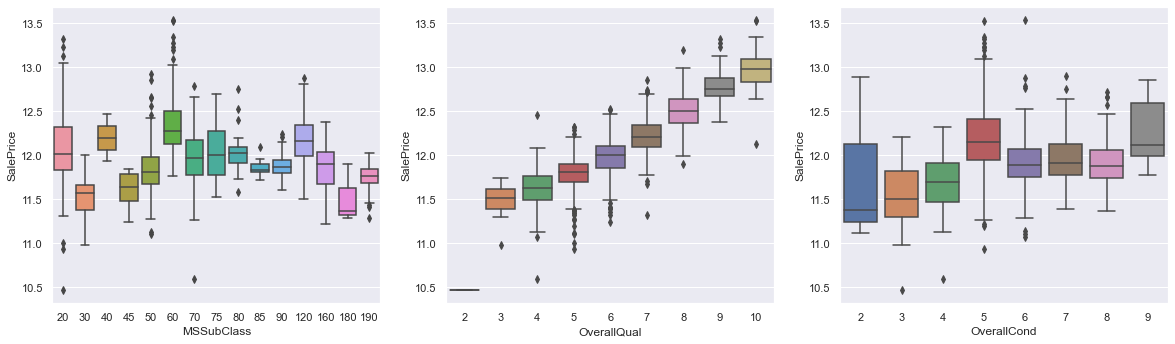

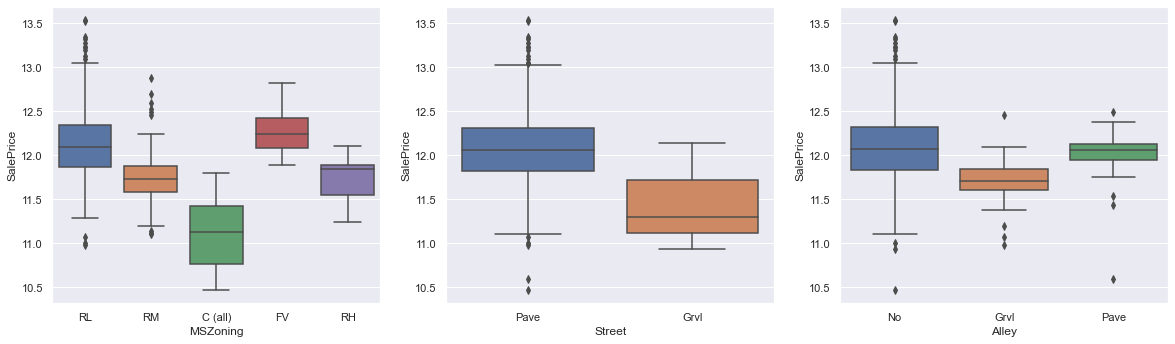

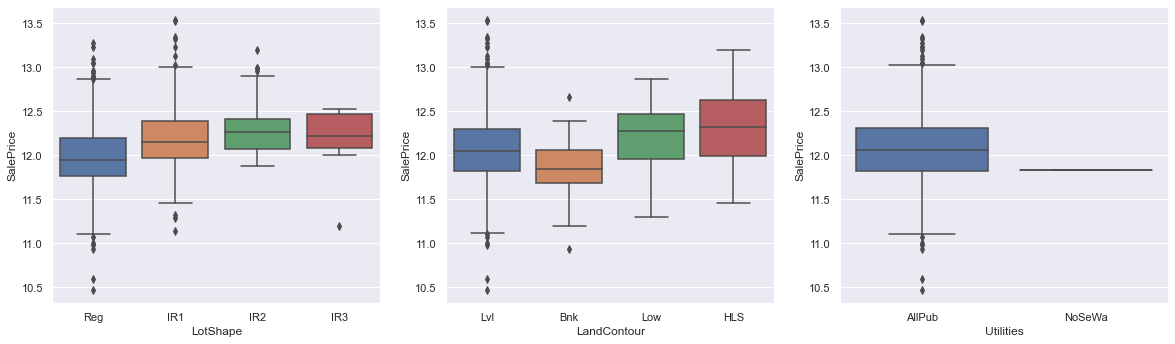

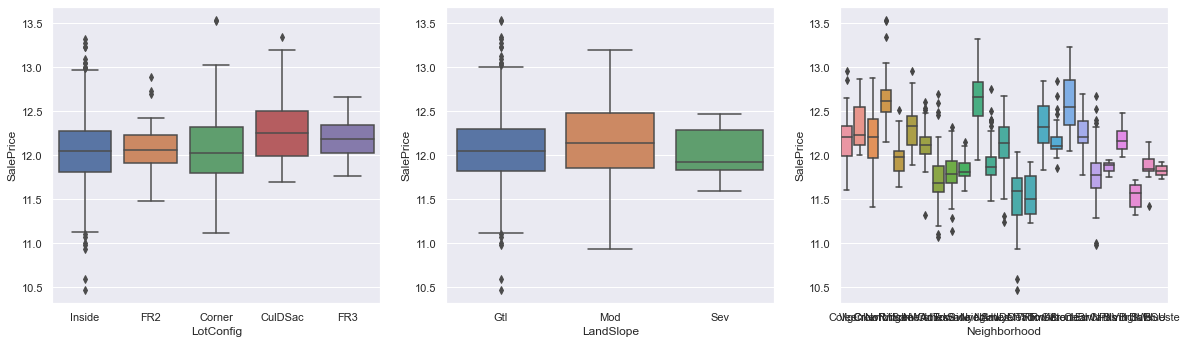

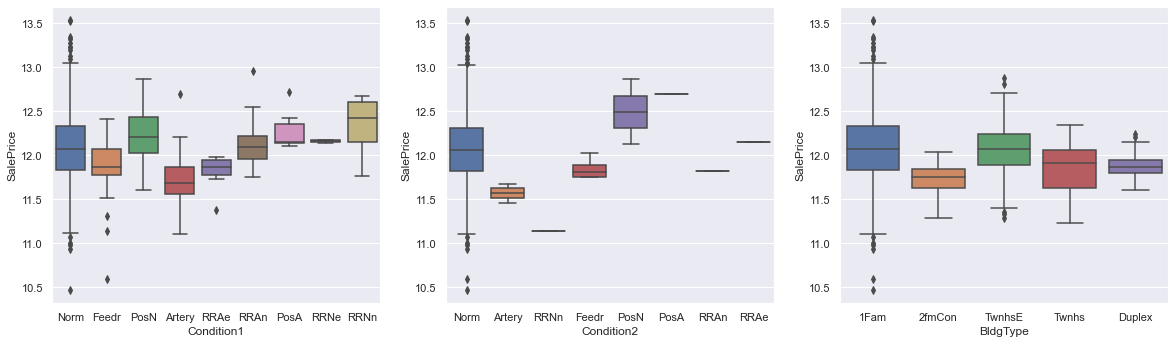

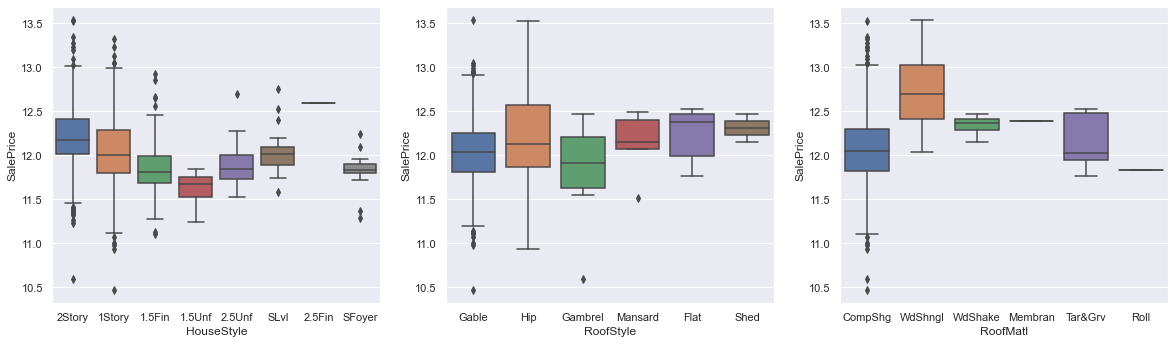

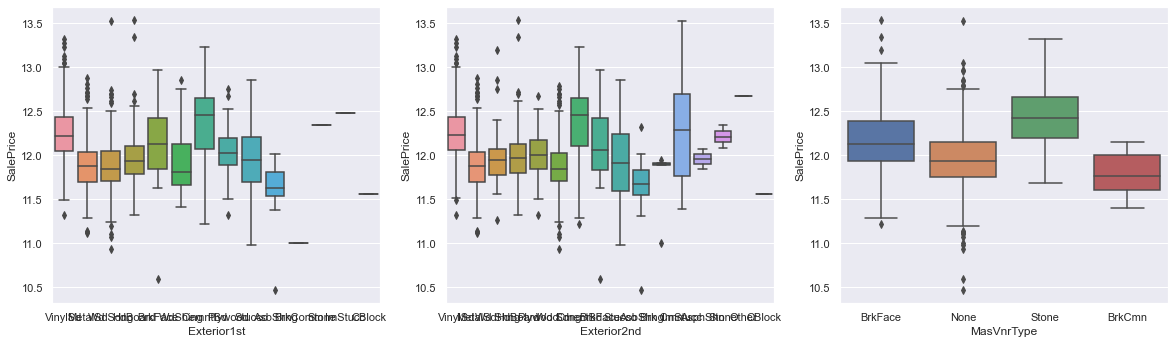

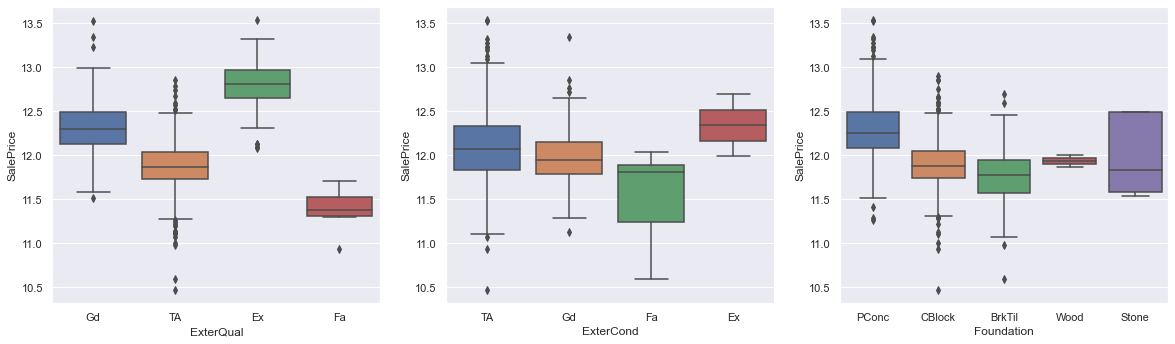

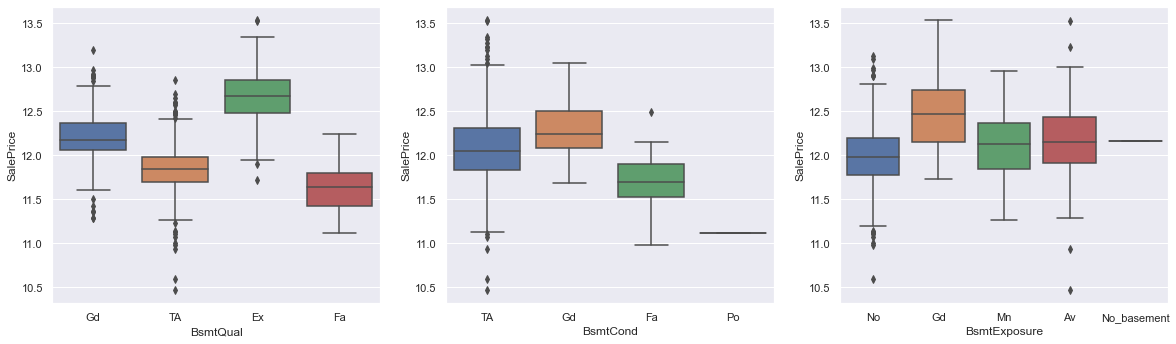

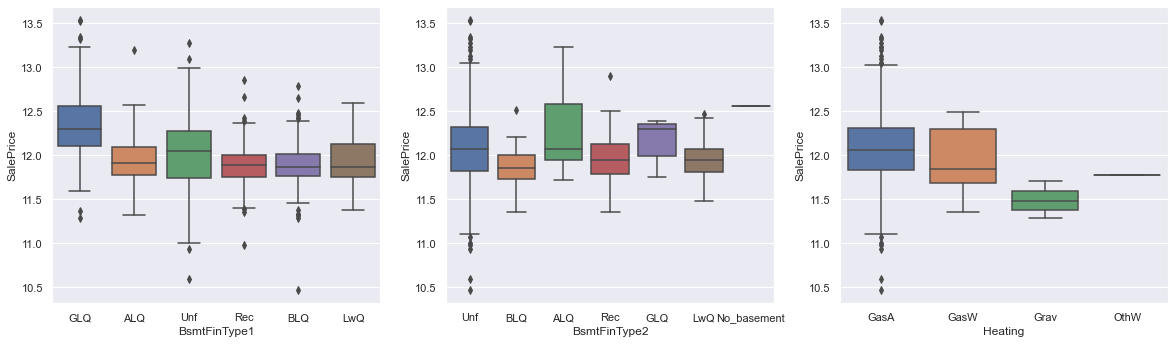

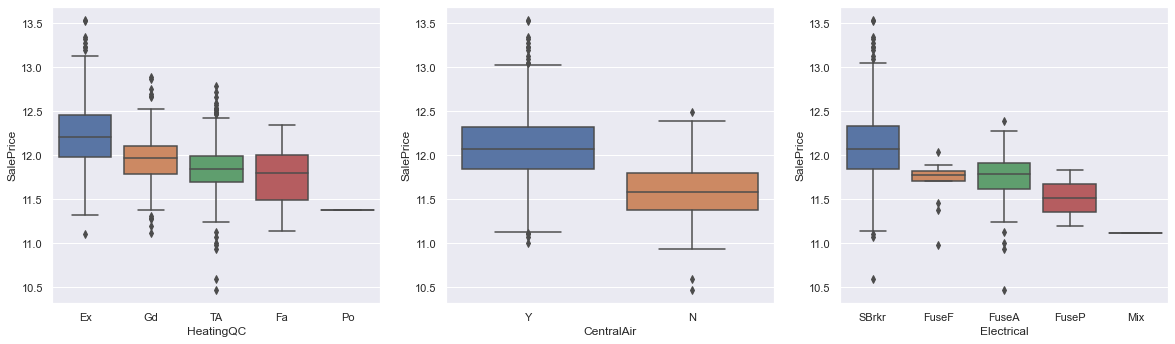

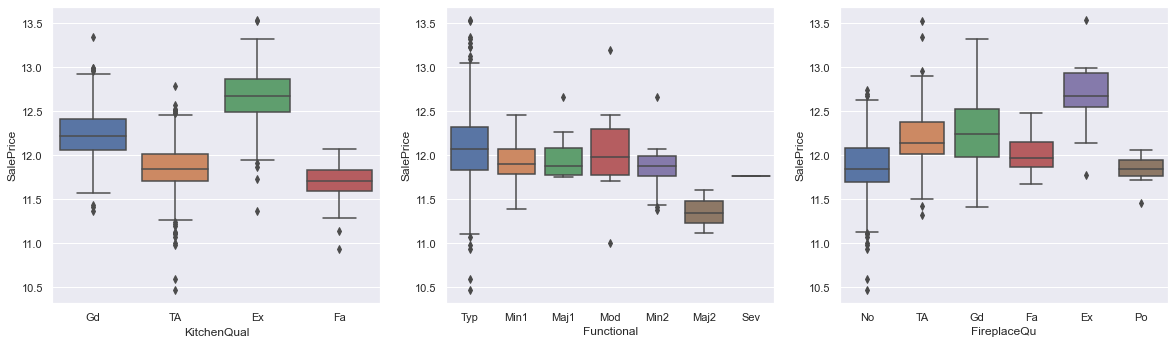

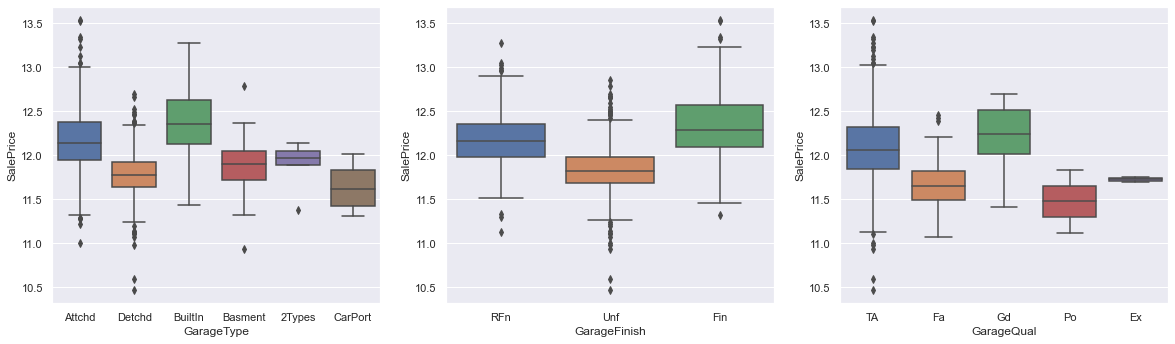

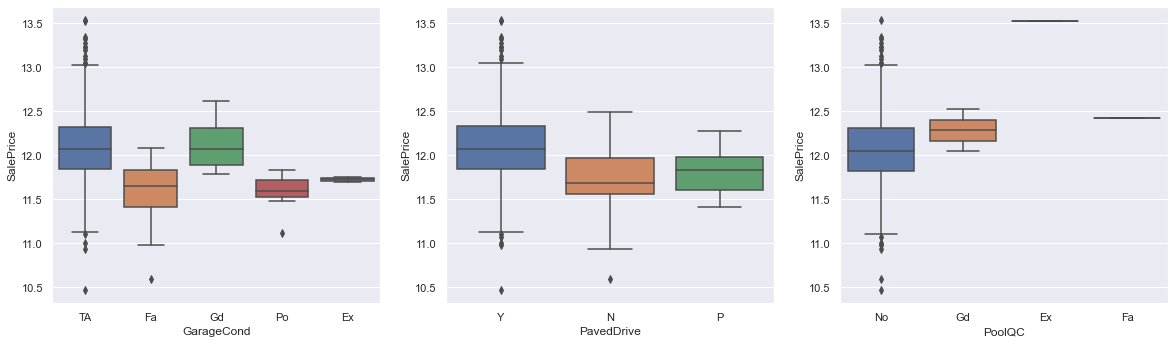

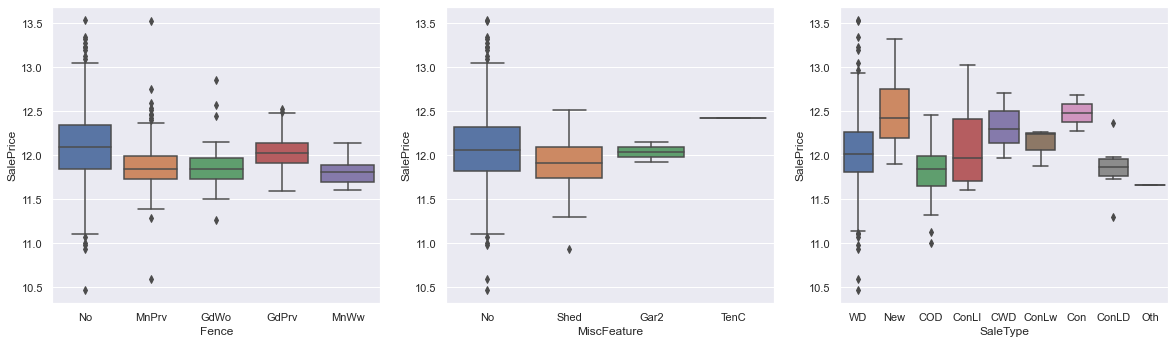

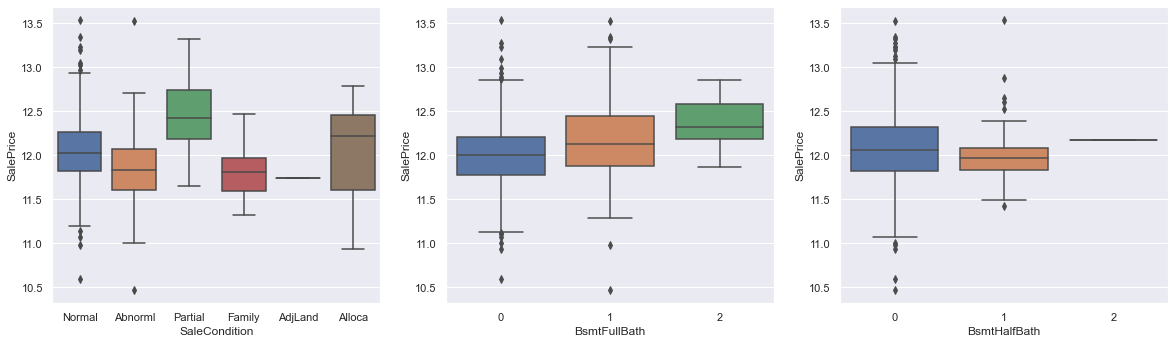

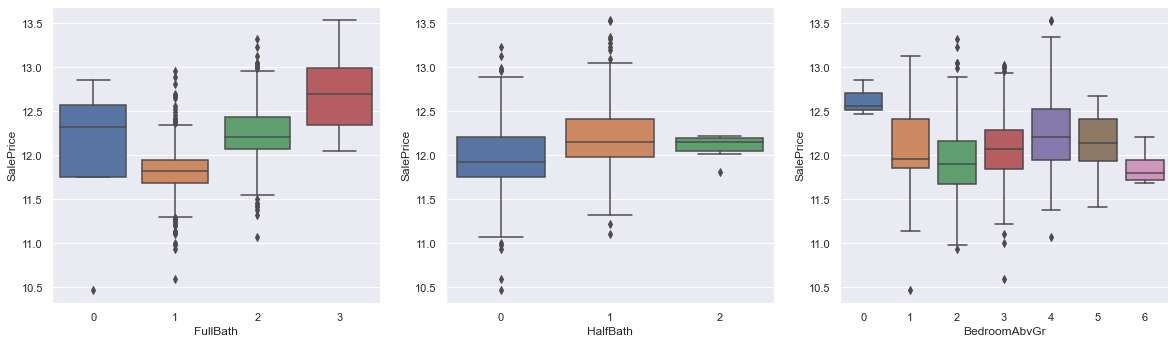

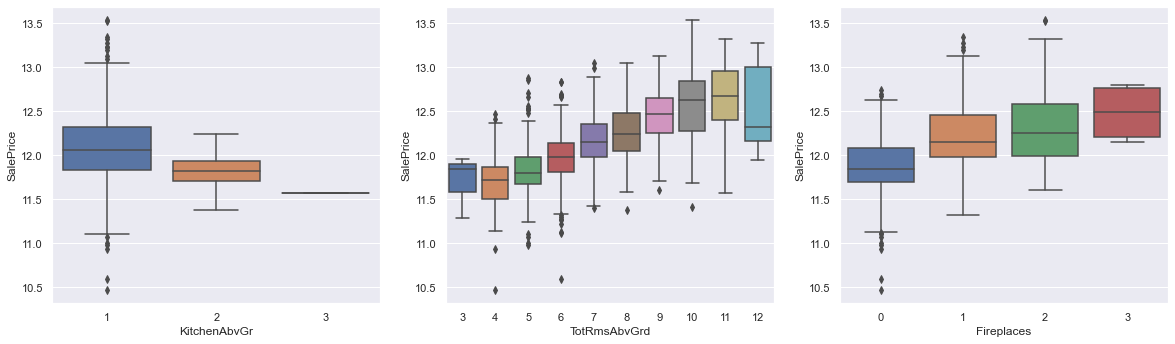

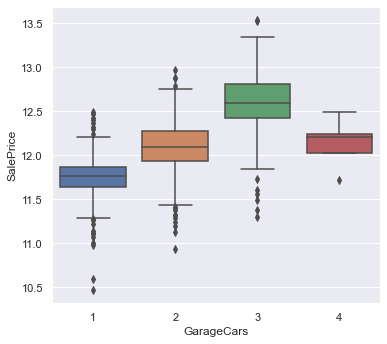

In [49]:
# Plot Box plot with 3 plots in one row
chunk_size = 3
for i in range(0, len(categorical_variables), chunk_size):  
    cat = categorical_variables[i:i + chunk_size]
    plt.figure(figsize=(20, 12))
    for i in range(0,len(cat)):   
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat[i], y = 'SalePrice', data = master_df)
    plt.show()

### Observation
- We can see that some of categorical variables are following a linearity pattern with Sale Price
- There are also some categorical variables which are more skewed towards one particular value and not much variations in values

### Variation of values in categorical variables

In [50]:
# Check value counts of each variable 
for i in categorical_variables:
    print(pd.DataFrame(master_df[i].value_counts(normalize=True)*100))
    print()

     MSSubClass
20    38.418530
60    23.162939
50     9.105431
120    6.469649
160    4.472843
70     4.392971
80     4.073482
30     3.753994
90     1.677316
190    1.517572
85     1.118211
75     0.718850
45     0.718850
180    0.239617
40     0.159744

    OverallQual
6     26.837061
5     25.159744
7     23.961661
8     12.939297
4      5.670927
9      3.434505
10     1.277955
3      0.638978
2      0.079872

   OverallCond
5    58.706070
6    16.613419
7    13.258786
8     5.271565
4     3.354633
9     1.357827
3     1.198083
2     0.239617

          MSZoning
RL       80.111821
RM       13.658147
FV        4.952077
RH        0.718850
C (all)   0.559105

         Street
Pave  99.760383
Grvl   0.239617

          Alley
No    93.929712
Grvl   3.194888
Pave   2.875399

      LotShape
Reg  61.900958
IR1  34.824281
IR2   2.635783
IR3   0.638978

     LandContour
Lvl    91.373802
HLS     3.434505
Bnk     3.354633
Low     1.837061

        Utilities
AllPub  99.920128
NoSeWa   0.079872



### Observation
- Street, Alley, LandContour, Utilities, LandSlope, Condition2, RoofMatl, Heating,Electrical,Functional, GarageQual,GarageCond,PavedDrive,PoolQC, MiscFeature,KitchenAbvGr all have more than 92% of values concentrated to a single values
- Hence we can drop these columns

In [51]:
# Lets put the dropped columns in list
drop_cats_col = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating',
                 'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive','PoolQC', 'MiscFeature',
                 'KitchenAbvGr','BsmtCond']
# LEts drop the columns from master DF
master_df.drop(drop_cats_col,axis=1,inplace=True)
# Remove them from categorical_variables 
categorical_variables = [ i for i in categorical_variables if i not in drop_cats_col]
check_cols_covered()

True

### Analyse Categorical Variables Again

In [52]:
# Lets check value counts again
for i in categorical_variables:
    print(pd.DataFrame(master_df[i].value_counts(normalize=True)*100))
    print()

     MSSubClass
20    38.418530
60    23.162939
50     9.105431
120    6.469649
160    4.472843
70     4.392971
80     4.073482
30     3.753994
90     1.677316
190    1.517572
85     1.118211
75     0.718850
45     0.718850
180    0.239617
40     0.159744

    OverallQual
6     26.837061
5     25.159744
7     23.961661
8     12.939297
4      5.670927
9      3.434505
10     1.277955
3      0.638978
2      0.079872

   OverallCond
5    58.706070
6    16.613419
7    13.258786
8     5.271565
4     3.354633
9     1.357827
3     1.198083
2     0.239617

          MSZoning
RL       80.111821
RM       13.658147
FV        4.952077
RH        0.718850
C (all)   0.559105

      LotShape
Reg  61.900958
IR1  34.824281
IR2   2.635783
IR3   0.638978

         LotConfig
Inside   71.884984
Corner   17.811502
CulDSac   6.549521
FR2       3.434505
FR3       0.319489

         Neighborhood
NAmes       15.415335
CollgCr     11.581470
OldTown      7.108626
Somerst      6.629393
NridgHt      6.150160
Gilbert 

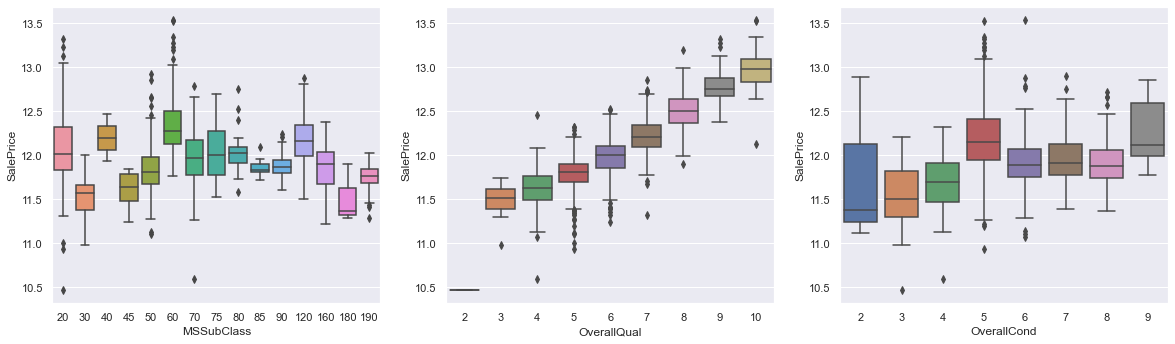

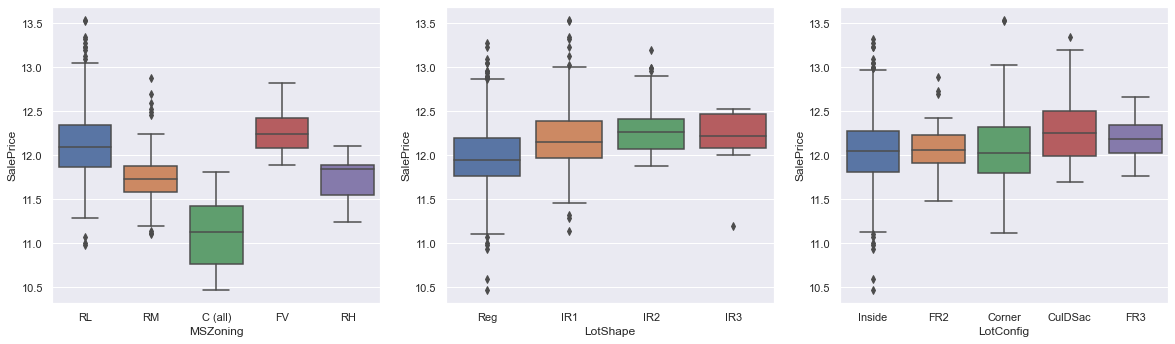

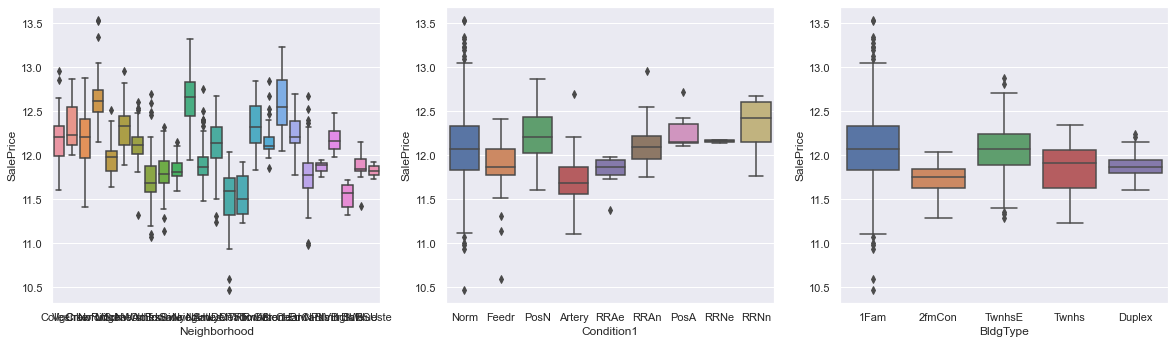

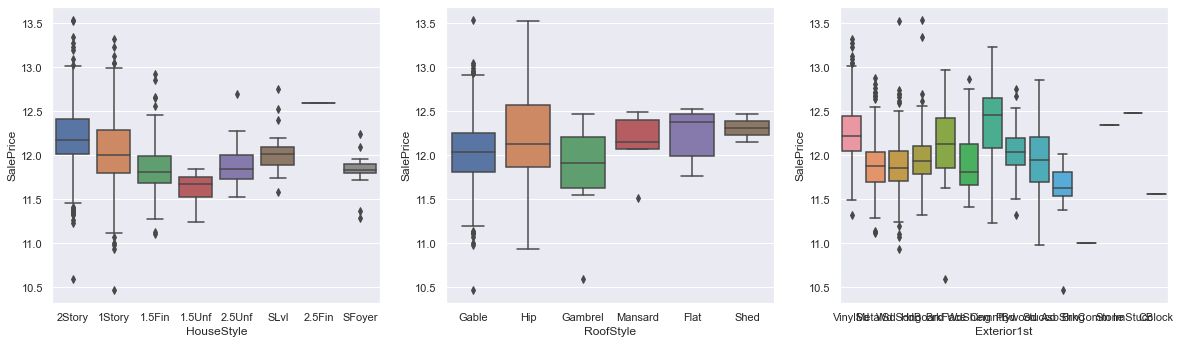

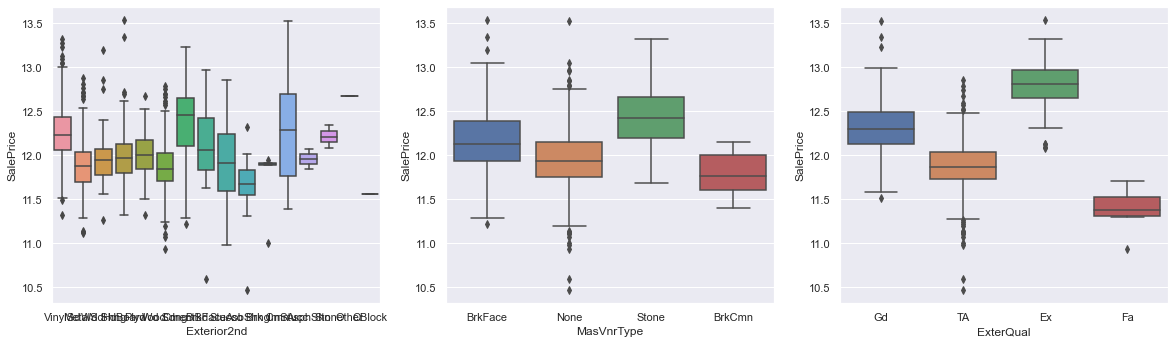

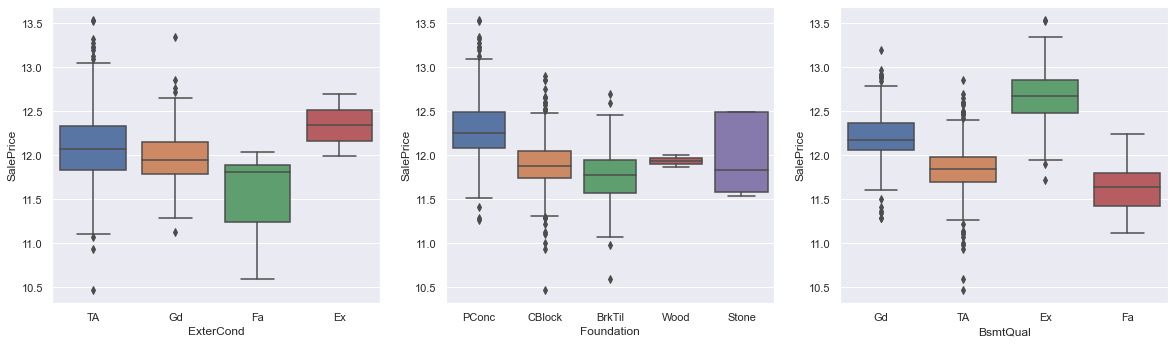

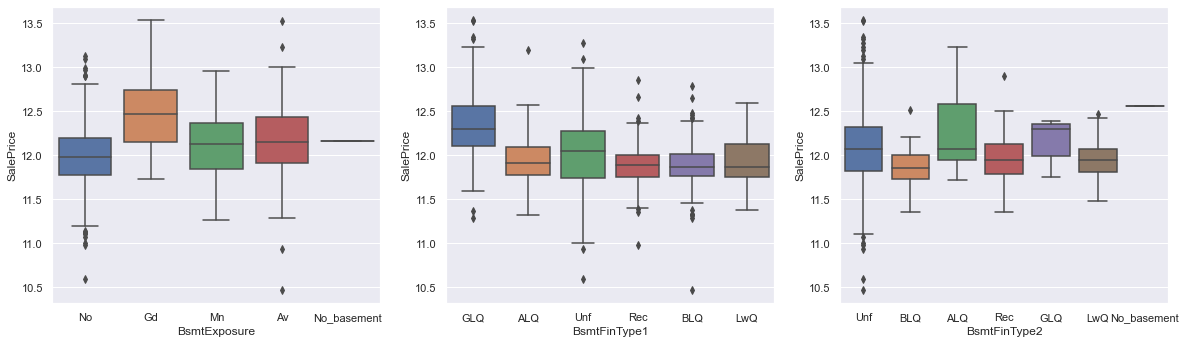

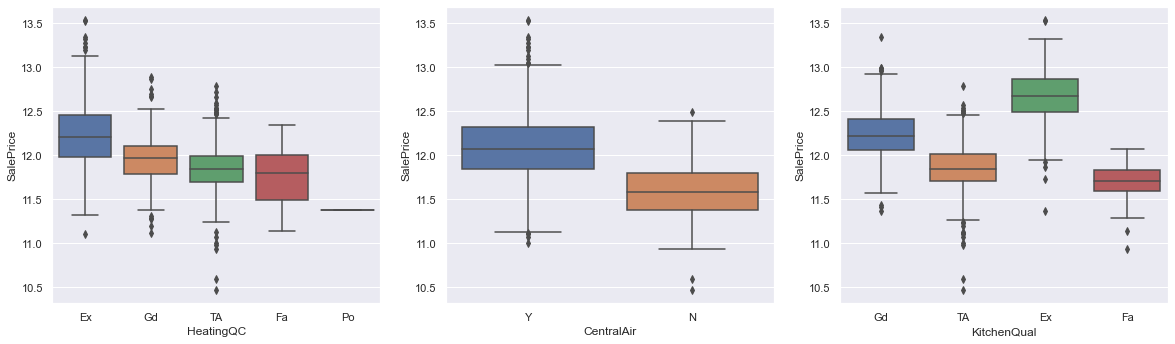

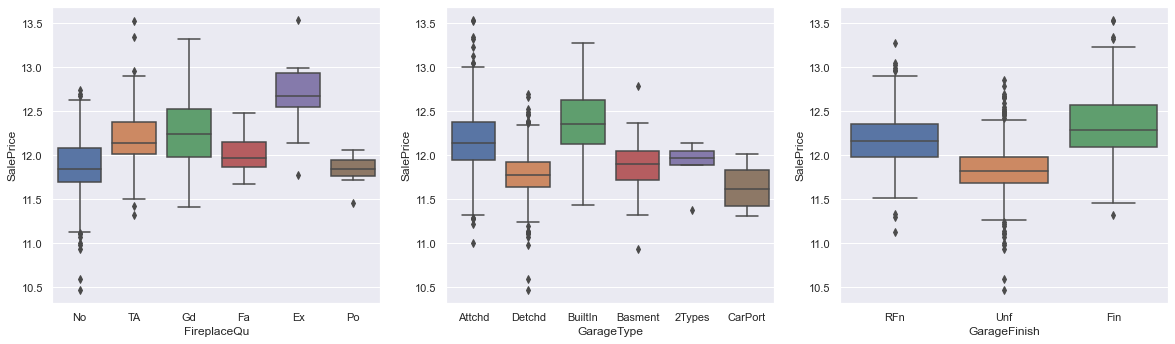

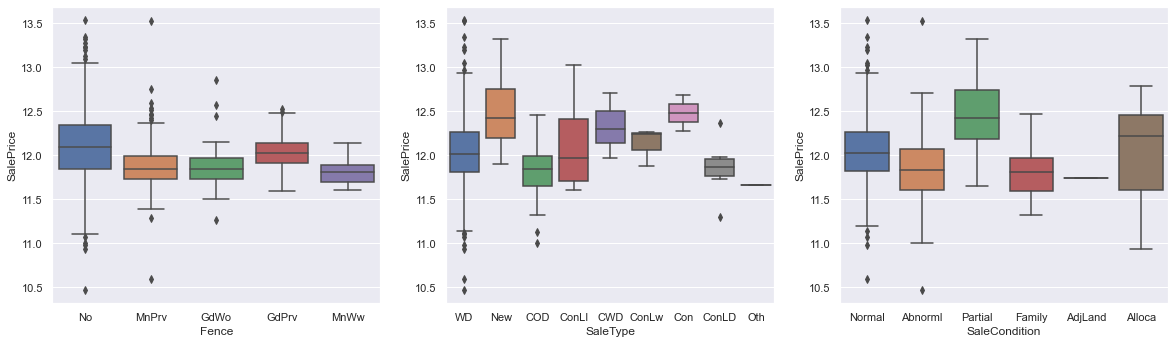

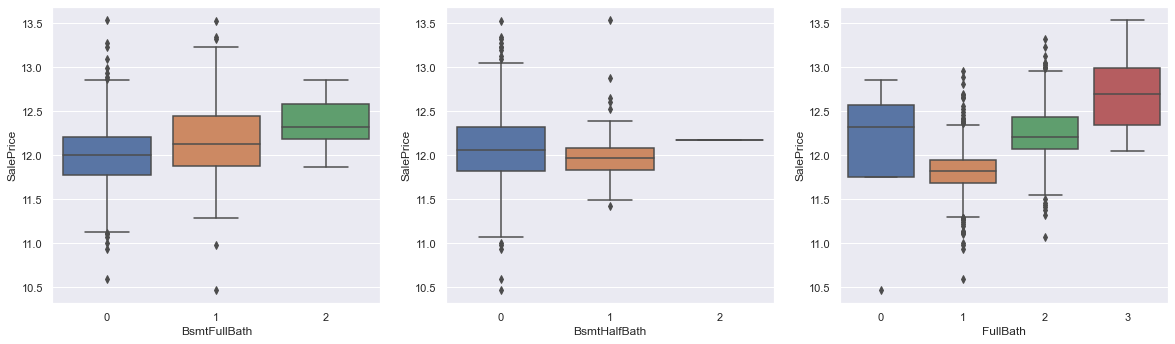

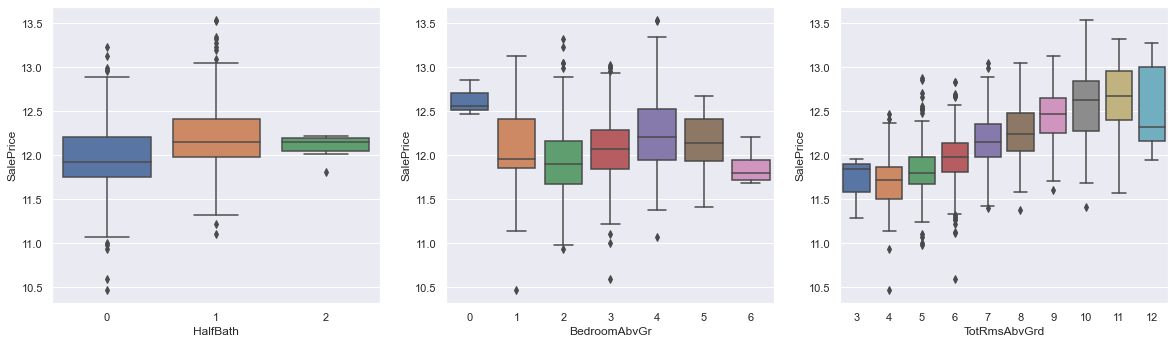

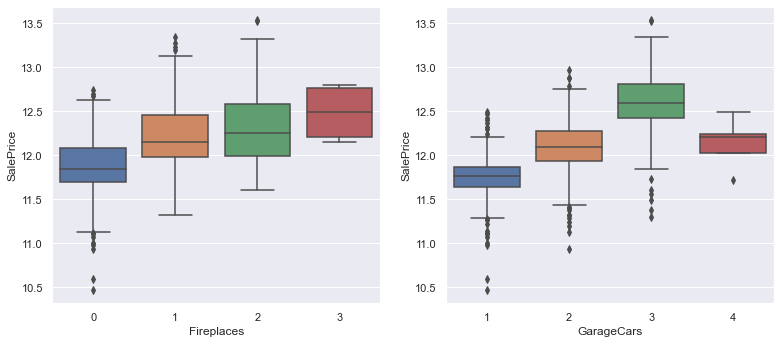

In [53]:
# Plot Box Plots again
chunk_size = 3
for i in range(0, len(categorical_variables), chunk_size):  
    cat = categorical_variables[i:i + chunk_size]
    #print(cat)
    plt.figure(figsize=(20, 12))
    for i in range(0,len(cat)):   
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat[i], y = 'SalePrice', data = master_df)
    plt.show()

### Observation 
- we can see that BsmtFinType1, BsmtFinType2 do not much relation with Sale Price, lets drop it
- Also we can see there Bathroom Features does not have much relation with Price, hence lets try to combine and create a new Single Total Bath variable

In [54]:
# Drop BsmtFinType1 and BsmtFinType2
master_df.drop(['BsmtFinType1', 'BsmtFinType2'],axis=1,inplace=True)
# Remove from list
categorical_variables.remove("BsmtFinType1")
categorical_variables.remove("BsmtFinType2")
# Check all columsn covered again
check_cols_covered()

True

### Bathroom features
Before we create new variables, lets check if the total bathroom variable is actually helpful 

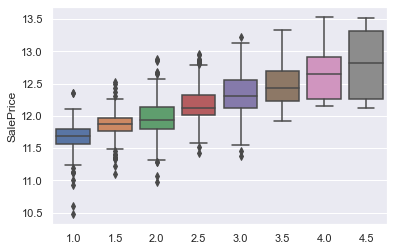

In [55]:
# Plot the new variable to check relation. Here we are multiplying 0.5 to half bathroom as it half
sns.boxplot(master_df['HalfBath']*0.5+master_df['FullBath']+master_df['BsmtFullBath']+master_df['BsmtHalfBath']*0.5,master_df.SalePrice)
plt.show()

### Observation
- We can see that after combining all the bathroom features, we are able to see some relation

In [56]:
# Combine Bathroom variables
master_df['TotalBath'] = master_df['HalfBath']*0.5 + master_df['FullBath']+master_df['BsmtFullBath']+master_df['BsmtHalfBath']*0.5

In [57]:
# Drop variables
master_df.drop(['HalfBath','FullBath','BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)
# Remove bathroom variables
categorical_variables.remove("HalfBath")
categorical_variables.remove("FullBath")
categorical_variables.remove("BsmtFullBath")
categorical_variables.remove("BsmtHalfBath")
# Add total bathroom to list
categorical_variables.append("TotalBath")
check_cols_covered()

True

## Date Variables Analysis

In [58]:
# Check the Data of date variables
master_df[date_variables].head()

,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,2008,2,2003,2003,2003.0
1,2007,5,1976,1976,1976.0
2,2008,9,2001,2002,2001.0
3,2006,2,1915,1970,1998.0
4,2008,12,2000,2000,2000.0


### Create Age Variables and remove year

In [59]:
# Calculate Age since last sold
master_df['Age_since_last_sold'] = 2020 - master_df.YrSold
# Calculate age since built
master_df['Age_since_built'] = 2020 - master_df.YearBuilt
# Calculate Age since re modified 
master_df['Age_since_remodified'] = 2020 - master_df.YearRemodAdd
# Calculate Age since garage was built
master_df['Age_since_garage_built'] = 2020 - master_df.GarageYrBlt
# Calculate number of years sold after last remodifed
master_df['yrs_sold_after_remod'] = master_df.YrSold - master_df.YearRemodAdd
# Calculate number of years sold after built
master_df['yrs_sold_after_built'] = master_df.YrSold - master_df.YearBuilt
# Convert into into integer column
master_df['Age_since_garage_built'] = master_df['Age_since_garage_built'].astype(int)
# Drop the redundant years columns from DF and list
master_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)
date_variables.remove("YrSold")
date_variables.remove("YearBuilt")
date_variables.remove("GarageYrBlt")
date_variables.remove("YearRemodAdd")
date_variables.extend(['Age_since_last_sold','Age_since_built','Age_since_remodified','Age_since_garage_built','yrs_sold_after_remod','yrs_sold_after_built'])
check_cols_covered()

True

In [60]:
# Impute the Age_since_garage_built as 0 for the values where its 2020, since the garage built year was imputed as 0 for no garage house.
master_df['Age_since_garage_built'] = master_df['Age_since_garage_built'].apply(lambda x: 0 if x==2020 else x)

### Analyse month Sold

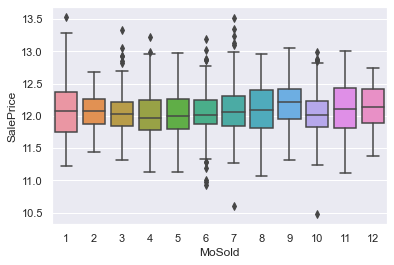

In [61]:
# Boxplot Month Sold
sns.boxplot(master_df.MoSold,master_df.SalePrice)
plt.show()

### Observation
- We can drop Month sold as it doesnt have much relation to sale price as all of IQR box are of same distance

In [62]:
# Drop Month Sold Column
master_df.drop("MoSold",axis=1,inplace=True)
date_variables.remove("MoSold")
check_cols_covered()

True

### Analyse Date Variables again

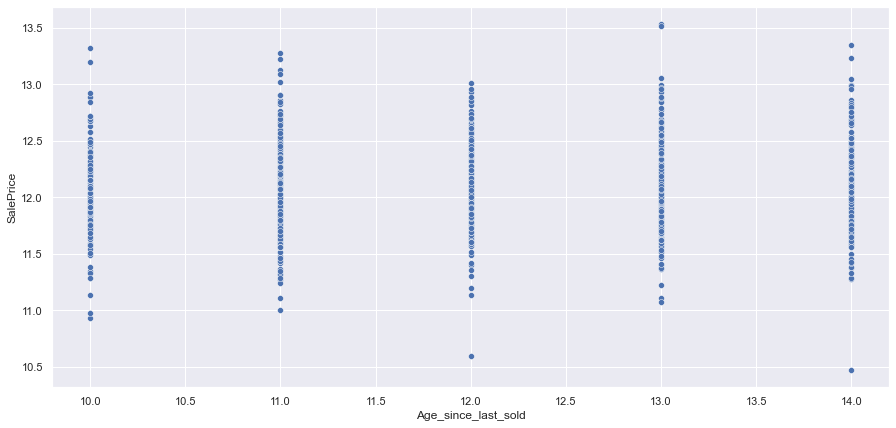

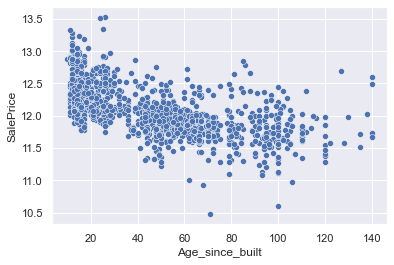

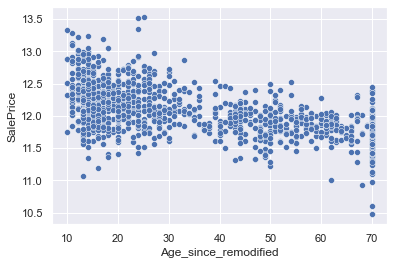

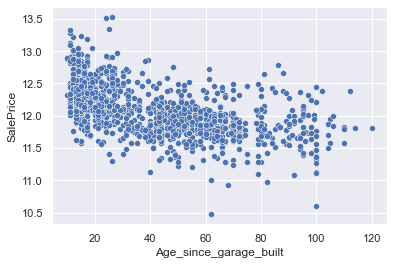

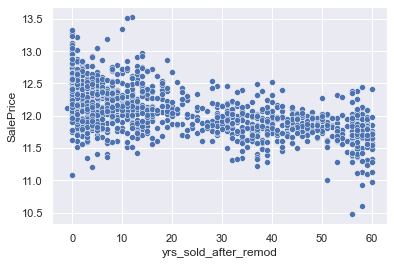

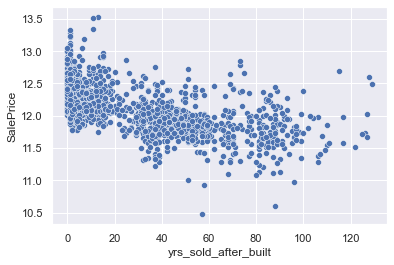

In [63]:
sns.set(style='darkgrid')
plt.figure(figsize=[15,7])
#yr_vars = [k for k in date_variables if k!='MoSold']
for i in date_variables:
    sns.scatterplot(data=master_df,x=i,y='SalePrice')
#plt.xticks(rotation=90)
    plt.show()

### Observation
- We see that Age Since last sold have discrete values, lets put it in categorical_variables
- Other date variables have a linear relationship with Sale Price

In [64]:
# Lets Check the value counts
master_df.Age_since_last_sold.value_counts()

13    293
11    287
14    261
12    260
10    151
Name: Age_since_last_sold, dtype: int64

In [65]:
# Move Age_since_last_sold to categorical_variables
date_variables.remove('Age_since_last_sold')
categorical_variables.append('Age_since_last_sold')
check_cols_covered()

True

#### Take Backup check point

In [66]:
df = master_df.copy()

# Encode Categorical Variables
- Here we will create dummy variables for nominal categorical variables which do not follow order
- Also, we will Label Encode the ordinal variables

## Ordinal Encoding

In [67]:
# Check categorical variables data again
master_df[categorical_variables].head()

,MSSubClass,OverallQual,OverallCond,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,TotalBath,Age_since_last_sold
0,60,7,5,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,Ex,Y,Gd,No,Attchd,RFn,No,WD,Normal,3,8,0,2,3.5,12
1,20,6,8,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,Ex,Y,TA,TA,Attchd,RFn,No,WD,Normal,3,6,1,2,2.5,13
2,60,7,5,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,Ex,Y,Gd,TA,Attchd,RFn,No,WD,Normal,3,6,1,2,3.5,12
3,70,7,5,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,Gd,Y,Gd,Gd,Detchd,Unf,No,WD,Abnorml,3,7,1,3,2.0,14
4,60,8,5,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,Ex,Y,Gd,TA,Attchd,RFn,No,WD,Normal,4,9,1,3,3.5,12


### Observation
- OverallQual, OverallCond , BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars are ordinal variables, hence the order needs to stay. So lets not create dummies for them. Also the we do not need to label encode it as it already follows order of label encoding
- Age_since_last_sold is also a ordinal variable, hence lets label encode it  

In [68]:
# Create ordinal variables List
ordinal_variable = ['OverallQual', 'OverallCond' , 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','Age_since_last_sold','TotalBath']
# Create dummy variables List removing ordinal
dummy_vars = [i for i in categorical_variables if i not in ordinal_variable]
master_df[dummy_vars].head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,Ex,Y,Gd,No,Attchd,RFn,No,WD,Normal
1,20,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,Ex,Y,TA,TA,Attchd,RFn,No,WD,Normal
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,Ex,Y,Gd,TA,Attchd,RFn,No,WD,Normal
3,70,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,Gd,Y,Gd,Gd,Detchd,Unf,No,WD,Abnorml
4,60,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,Ex,Y,Gd,TA,Attchd,RFn,No,WD,Normal


In [69]:
# Label Encode Age_since_last_sold
le = LabelEncoder() 
master_df['Age_since_last_sold'] = le.fit_transform(master_df['Age_since_last_sold'])

In [70]:
# Label Encode TotalBath
le = LabelEncoder() 
master_df['TotalBath'] = le.fit_transform(master_df['TotalBath'])

In [71]:
# Create Function to map ordinal variables to custom numbers since its of object type
def map_ordinals(data):
        
    # ExterQual: Evaluates the quality of the material on the exterior 
    ExterQual = {}
    ExterQual['Ex'] = 5 #'Excellent'
    ExterQual['Gd'] = 4 #'Good'
    ExterQual['TA'] = 3 #'Average/Typical'
    ExterQual['Fa'] = 2 #'Fair'
    ExterQual['Po'] = 1 #'Poor'
    ExterQual['No'] = 0 #'NA'

    data.ExterQual = data.ExterQual.map(ExterQual)

    # ExterCond: Evaluates the present condition of the material on the exterior
    data.ExterCond = data.ExterCond.map(ExterQual)

    #HeatingQC: Heating quality and condition
    data.HeatingQC = data.HeatingQC.map(ExterQual)

    # KitchenQual: Kitchen quality
    data.KitchenQual = data.KitchenQual.map(ExterQual)

    # FireplaceQu: Fireplace quality
    data.FireplaceQu = data.FireplaceQu.map(ExterQual)

    # LotShape: General shape of property
    LotShape = {}
    LotShape['Reg'] = 4 #'Regular'
    LotShape['IR1'] = 3 #'Slightly irregular'
    LotShape['IR2'] = 2 #'Moderately Irregular'
    LotShape['IR3'] = 1 #'Irregular'

    data.LotShape = data.LotShape.map(LotShape)

    # BsmtQual: Evaluates the height of the basement
    BsmtQual = {}
    BsmtQual['Ex'] = 5 #'Excellent (100+ inches)'
    BsmtQual['Gd'] = 4 #'Good (90-99 inches)'
    BsmtQual['TA'] = 3 #'Typical (80-89 inches)'
    BsmtQual['Fa'] = 2 #'Fair (70-79 inches)'
    BsmtQual['Po'] = 1 #'Poor (<70 inches'
    BsmtQual['NA'] = 0 #'No Basement'

    data.BsmtQual = data.BsmtQual.map(BsmtQual)
    
    # BsmtExposure: Refers to walkout or garden level walls
    BsmtExposure = {}
    BsmtExposure['Gd'] = 4 #'Good Exposure'
    BsmtExposure['Av'] = 3 #'Average Exposure (split levels or foyers typically score average or above)'
    BsmtExposure['Mn'] = 2 #'Mimimum Exposure'
    BsmtExposure['No'] = 1 #'No Exposure'
    BsmtExposure['No_basement'] = 0 #'No Basement'

    data.BsmtExposure = data.BsmtExposure.map(BsmtExposure)

    #CentralAir: Central air conditioning
    # Since with this transformatio as the same as binarize this feature
    CentralAir = {}
    CentralAir['N'] = 0
    CentralAir['Y'] = 1

    data.CentralAir = data.CentralAir.map(CentralAir)

    # GarageFinish: Interior finish of the garage
    GarageFinish = {}
    GarageFinish['Fin'] = 3 #'Finished'
    GarageFinish['RFn'] = 2 #'Rough Finished'
    GarageFinish['Unf'] = 1 #'Unfinished'
    GarageFinish['NA'] = 0 #'No Garage'
    
    data.GarageFinish = data.GarageFinish.map(GarageFinish)

    # Fence: Fence quality
    Fence = {}
    Fence['GdPrv'] = 5 #'Good Privacy'
    Fence['MnPrv'] = 4 #'Minimum Privacy'
    Fence['GdWo'] = 3 #'Good Wood'
    Fence['MnWw'] = 2 #'Minimum Wood/Wire'
    Fence['No'] = 1 #'No Fence'

    data.Fence = data.Fence.map(Fence)
            
    return data

In [72]:
# Map ordinal variables using the function above
master_df[dummy_vars] = map_ordinals(master_df[dummy_vars])
master_df[dummy_vars].head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,60,RL,4,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,1,5,1,4,0,Attchd,2,1,WD,Normal
1,20,RL,4,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,3,3,CBlock,4,4,5,1,3,3,Attchd,2,1,WD,Normal
2,60,RL,3,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,2,5,1,4,3,Attchd,2,1,WD,Normal
3,70,RL,3,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,1,4,1,4,4,Detchd,1,1,WD,Abnorml
4,60,RL,3,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,5,1,4,3,Attchd,2,1,WD,Normal


In [73]:
# Move them to ordinal variables list from dummy variables list
ordinal_variable.extend(['ExterQual','ExterCond','HeatingQC','KitchenQual','FireplaceQu','LotShape','BsmtQual',
                         'BsmtExposure','CentralAir','GarageFinish','Fence'])
dummy_vars = [i for i in dummy_vars if i not in ordinal_variable]
# Check if all categorical columns are covered
len(dummy_vars+ordinal_variable) == len(categorical_variables)

True

In [74]:
# Checkpoint : take backup
df = master_df.copy()

## Dummy Encoding

In [75]:
# Create Function to create dummy variables
def encode_categorical(col_name,df):
    dummies = pd.get_dummies(df[col_name], drop_first = True,prefix=col_name,prefix_sep='_')
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(col_name,axis=1)
    return df

In [76]:
master_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,TotalBath,Age_since_last_sold,Age_since_built,Age_since_remodified,Age_since_garage_built,yrs_sold_after_remod,yrs_sold_after_built
0,60,RL,4.189655,9.042040,4,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.283204,4,3,PConc,4,1,6.561031,0.0,5.017280,6.753438,5,1,6.753438,6.751101,0.0,7.444833,3,4,8,0,0,Attchd,2,2,6.308098,0.000000,4.127134,1,WD,Normal,12.247699,5,2,17,17,17,5,5
1,20,RL,4.394449,9.169623,4,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.000000,3,3,CBlock,4,4,6.886532,0.0,5.652489,7.141245,5,1,7.141245,0.000000,0.0,7.141245,3,3,6,1,3,Attchd,2,2,6.133398,5.700444,0.000000,1,WD,Normal,12.109016,3,3,44,44,44,31,31
2,60,RL,4.234107,9.328212,3,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.093750,4,3,PConc,4,2,6.188264,0.0,6.075346,6.825460,5,1,6.825460,6.765039,0.0,7.488294,3,4,6,1,3,Attchd,2,2,6.411818,0.000000,3.761200,1,WD,Normal,12.317171,5,2,19,18,19,6,7
3,70,RL,4.110874,9.164401,3,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.000000,3,3,BrkTil,3,1,5.379897,0.0,6.293419,6.629363,4,1,6.869014,6.629363,0.0,7.448916,3,4,7,1,4,Detchd,1,3,6.466145,0.000000,3.583519,1,WD,Abnorml,11.849405,2,4,105,50,22,36,91
4,60,RL,4.442651,9.565284,3,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,5.860786,4,3,PConc,4,3,6.486161,0.0,6.196444,7.044033,5,1,7.044033,6.960348,0.0,7.695758,4,4,9,1,3,Attchd,2,3,6.729824,5.262690,4.442651,1,WD,Normal,12.429220,5,2,20,20,20,8,8


In [77]:
# Create dummy variables for all other categorical variables
for i in dummy_vars:
    master_df = encode_categorical(i,master_df)
print("Shape",master_df.shape)

Shape (1252, 162)


In [78]:
master_df.head(2)

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,TotalBath,Age_since_last_sold,Age_since_built,Age_since_remodified,Age_since_garage_built,yrs_sold_after_remod,yrs_sold_after_built,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,4,7,5,5.283204,4,3,4,1,6.561031,0.0,5.017280,6.753438,5,1,6.753438,6.751101,0.0,7.444833,3,4,8,0,0,2,2,6.308098,0.000000,4.127134,1,12.247699,5,2,17,17,17,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.169623,4,6,8,0.000000,3,3,4,4,6.886532,0.0,5.652489,7.141245,5,1,7.141245,0.000000,0.0,7.141245,3,3,6,1,3,2,2,6.133398,5.700444,0.000000,1,12.109016,3,3,44,44,44,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Model Building

## Split the dataset into train and test DataFrames

In [79]:
# Split using sklearn's train_test_split with random state 0 and split size 70 30
df_train, df_test = train_test_split(master_df, test_size = 0.3, random_state = 0)
# Check the shape
print("Train: ", df_train.shape)
print("Test: ", df_test.shape)

Train:  (876, 162)
Test:  (376, 162)


## Scale all variables
- Lets Standard Scale all numerical and ordinal variables so that they are on same scale

In [80]:
# Create STandard Scaler Object
scaler = StandardScaler()
# Fit the scaler and transform Training Dataset
df_train[numerical_variables+ordinal_variable] = scaler.fit_transform(df_train[numerical_variables+ordinal_variable])
# Using fitted scaler above, transform Test Set¶
df_test[numerical_variables+ordinal_variable] = scaler.transform(df_test[numerical_variables+ordinal_variable])

## Split train and test to X and Y

In [81]:
# Pop Sale Price from train set
y_train = df_train.pop("SalePrice")
# Move remaining to X
X_train = df_train
# Pop Sale Price from test
y_test = df_test.pop("SalePrice")
# Move remaining to y
X_test = df_test

In [82]:
# Shape of X
X_train.shape,X_test.shape

((876, 161), (376, 161))

In [83]:
# Shape of y
y_train.shape,y_test.shape

((876,), (376,))

# Lasso Regularization

- Lets apply lasso directly on the X without applying RFE

In [84]:
# Initialize Lasso Object
lasso_model = Lasso()

# Initialize Alpha/Lambda values
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
  ]}

# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as R2 Score as its easy to read
scoring_method = 'r2'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=lasso_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1)

# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.179642,0.009868,0.008699,0.001910,0.0001,{'alpha': 0.0001},0.910253,0.884695,0.906102,0.891279,0.921914,0.902849,0.013359,5,0.943830,0.946144,0.944816,0.947677,0.942848,0.945063,0.001702
1,0.189129,0.011986,0.007987,0.000273,0.0002,{'alpha': 0.0002},0.912599,0.890871,0.903426,0.889918,0.925314,0.904425,0.013404,4,0.942449,0.944967,0.943295,0.946475,0.941228,0.943683,0.001852
2,0.194117,0.030150,0.008410,0.001546,0.0003,{'alpha': 0.0003},0.914133,0.895546,0.901222,0.889813,0.927407,0.905624,0.013549,1,0.941022,0.943567,0.941902,0.945422,0.939391,0.942261,0.002078
3,0.179029,0.006988,0.008144,0.000584,0.0004,{'alpha': 0.0004},0.913913,0.897867,0.898812,0.889868,0.927336,0.905559,0.013379,2,0.939941,0.942136,0.940670,0.944273,0.937687,0.940941,0.002200
4,0.175470,0.007933,0.008203,0.000391,0.0005,{'alpha': 0.0005},0.913619,0.898630,0.895799,0.889800,0.925987,0.904767,0.013196,3,0.938782,0.940661,0.939285,0.943040,0.936059,0.939565,0.002292
5,0.155093,0.056715,0.008976,0.001588,0.001,{'alpha': 0.001},0.910425,0.897478,0.889226,0.884633,0.918950,0.900142,0.012855,6,0.931112,0.931631,0.932701,0.935483,0.927512,0.931688,0.002577
6,0.141954,0.088136,0.008642,0.000523,0.002,{'alpha': 0.002},0.913448,0.895685,0.888282,0.878939,0.920005,0.899272,0.015349,7,0.921998,0.925212,0.925071,0.926528,0.919056,0.923573,0.002704
7,0.142439,0.088680,0.009609,0.000624,0.003,{'alpha': 0.003},0.913885,0.893154,0.887264,0.875010,0.917580,0.897379,0.016131,8,0.918276,0.921772,0.921497,0.923139,0.915225,0.919982,0.002864
8,0.103804,0.066029,0.008968,0.000245,0.004,{'alpha': 0.004},0.912878,0.890009,0.886989,0.871769,0.916096,0.895548,0.016685,9,0.913965,0.917859,0.917900,0.919778,0.911592,0.916219,0.002989
9,0.095764,0.062914,0.009922,0.002881,0.005,{'alpha': 0.005},0.912760,0.887051,0.886631,0.868379,0.914919,0.893948,0.017598,10,0.910750,0.913885,0.914207,0.916748,0.908317,0.912782,0.002934


### Observation 
- At alpha = 0.003, the train and mean score are very close around 90 and 92%

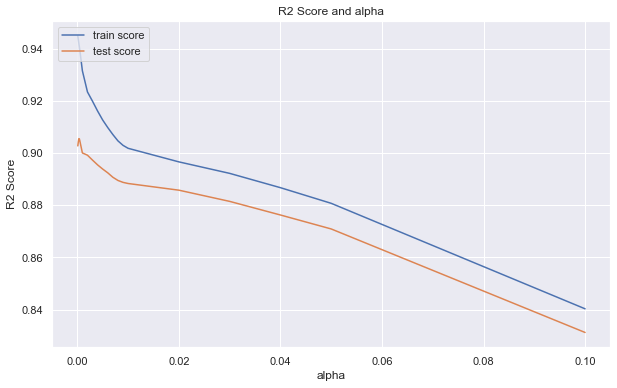

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=[10,6])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observation 
- We have got elbow graph and at 0.003 , the graph becomes parallel , which is our ideal alpha or lambda value

### Create Final Lasso Model

In [86]:
# Initialize Alpha
#alpha = 0.01
alpha = 0.003
# Creat Lasso Object
lasso = Lasso(alpha=alpha)
# Fit the lasso object to X Train        
lasso.fit(X_train, y_train)

Lasso(alpha=0.003)

In [87]:
# Create Features Dataframe
feature_df = pd.DataFrame({"features":X_train.columns,"coef": np.abs(lasso.coef_)})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted = feature_df[feature_df.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
feature_df_sorted

,features,coef
0,GrLivArea,0.305019
1,SaleType_New,0.232141
2,OverallQual,0.221789
3,Neighborhood_Crawfor,0.183899
4,Neighborhood_BrkSide,0.165537
5,OverallCond,0.146424
6,TotalBsmtSF,0.129946
7,MSSubClass_90,0.114866
8,SaleCondition_Normal,0.110321
9,Neighborhood_StoneBr,0.097577


### Observation 
- After Applying Lasso, many coefficients have been reduced to zero 
- Also we can see that final set of features is 57

### Top features 
- We can see that top 5 features that contribute to sale price of Houses are
    1. GrLivArea	       0.305019
        - living area square feet Above grade (ground) 
    2. SaleType_New	       0.232141
        - Type of sale is New 
    3. OverallQual	       0.221789
        - Rates the overall material and finish of the house 
    4. Neighborhood_Crawfor	0.183899
        - Physical locations within Ames city limits of Crawford
    5. Neighborhood_BrkSide	0.165537
        - Physical locations within Ames city limits of Brookside

# Model Evaluation
### Prediction of train and test set using the model

In [88]:
y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)

### Actual vs Predicted in test

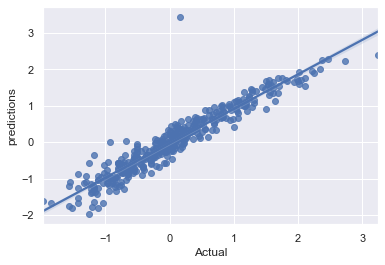

In [89]:
sns.regplot(y_test,y_test_pred_l)
plt.xlabel("Actual")
plt.ylabel("predictions")
plt.show()

### Observation
- We can see that train is linearly related to test predictions, hence we can say that most of the predictions were correct

### Variation covered by Model in test set

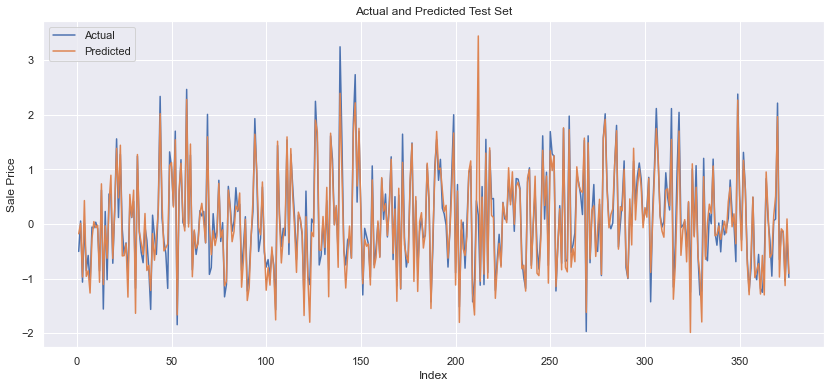

In [90]:
# Intitialize array with 1-max 
c = [i for i in range(1,y_test_pred_l.shape[0]+1,1)]
plt.figure(figsize=[14,6])
# Plot actual values
plt.plot(c,np.array(y_test),label='Actual')
# Plot predicted values
plt.plot(c,np.array(y_test_pred_l),label='Predicted')
# indicate the legends 
plt.legend(loc="upper left")
plt.title('Actual and Predicted Test Set')
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.show()

### Observation
the Model was able to explain most of the variations in the model

## R2 Score
### R2 Score on Train Set

In [91]:
r2_train_l = r2_score(y_train,y_train_pred_l)
round(r2_train_l,2)

0.92

### R2 Score on Test Set

In [92]:
r2_test_l = r2_score(y_test,y_test_pred_l)
round(r2_test_l,2)

0.89

### Observation
<div class="alert alert-block alert-success">We see that accuracy on train set is 92% and test set is 89% which are very close(difference of 3). Hence are our model hasn't overfitted and has fitted properly</div> 

## Mean Square Error

In [93]:
# Mean Square Error of train set
mse_train = mean_squared_error(y_train, y_train_pred_l)
round(mse_train,2)

0.08

In [94]:
# Mean Square Error of test set
mse_test = mean_squared_error(y_test, y_test_pred_l)
round(mse_test,2)

0.09

### Observation
<div class="alert alert-block alert-success">We can see that the mean square error is also less and close</div> 

# Ridge Regularization

In [95]:
# Initialize Ridge Object
ridge_model = Ridge()

# Initialize Alpha/Lambda values
#params = {'alpha':np.arange(0.01,0.2,0.01)}
params = {'alpha': [0.0001, 0.1, 1.0, 10.0, 20, 50, 100, 500, 1000,2000,3000,4000,5000 ]}

# Initialize cross validation folds
folds = 5

# Initialize Scoring method
scoring_method = 'r2'

# Create Grid Search CV
model_cv_r = GridSearchCV(estimator=ridge_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1)

# Fit the model
model_cv_r.fit(X_train,y_train)

# Check the result
cv_results_r = pd.DataFrame(model_cv_r.cv_results_)
cv_results_r

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.2s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014726,0.001359,0.007815,0.000168,0.0001,{'alpha': 0.0001},0.903556,0.868464,0.905904,0.887101,0.916224,0.896250,0.016741,6,0.944520,0.946943,0.945675,0.948406,0.943612,0.945831,0.001705
1,0.015860,0.002559,0.007961,0.000191,0.1,{'alpha': 0.1},0.906911,0.883259,0.904083,0.889929,0.921411,0.901118,0.013403,3,0.944134,0.946500,0.945260,0.948052,0.942993,0.945387,0.001770
2,0.015323,0.000915,0.007711,0.000184,1,{'alpha': 1.0},0.908506,0.897772,0.894244,0.889410,0.923056,0.902598,0.012004,1,0.939684,0.941664,0.941190,0.943606,0.937139,0.940657,0.002159
3,0.015057,0.001495,0.008108,0.000379,10,{'alpha': 10.0},0.912439,0.899188,0.888883,0.885654,0.920952,0.901423,0.013518,2,0.928457,0.930575,0.931446,0.932685,0.925749,0.929782,0.002443
4,0.022788,0.006691,0.009013,0.001760,20,{'alpha': 20},0.913938,0.897742,0.888622,0.883293,0.919653,0.900650,0.014086,4,0.923771,0.926265,0.927330,0.928741,0.921385,0.925498,0.002622
5,0.018744,0.003555,0.008897,0.001754,50,{'alpha': 50},0.914922,0.893672,0.886681,0.879887,0.916274,0.898287,0.014797,5,0.916109,0.919513,0.920655,0.922525,0.914441,0.918649,0.002965
6,0.016197,0.002351,0.007923,0.000587,100,{'alpha': 100},0.914174,0.888729,0.883308,0.876955,0.911851,0.895004,0.015187,7,0.908800,0.913168,0.914331,0.916301,0.907795,0.912079,0.003262
7,0.017199,0.003900,0.009990,0.001569,500,{'alpha': 500},0.897979,0.863479,0.863316,0.856444,0.888084,0.873860,0.016164,8,0.879284,0.886736,0.887793,0.888611,0.880243,0.884533,0.003951
8,0.016348,0.002884,0.009065,0.002428,1000,{'alpha': 1000},0.874514,0.839323,0.841767,0.831026,0.864859,0.850298,0.016511,9,0.852964,0.862176,0.862855,0.863560,0.854691,0.859249,0.004482
9,0.016077,0.002321,0.007872,0.000744,2000,{'alpha': 2000},0.828757,0.797366,0.801398,0.783302,0.824281,0.807021,0.017075,10,0.807952,0.818528,0.818941,0.820173,0.809636,0.815046,0.005161


### Observation
- At Alpha = 1, we can see that test and train score are close together

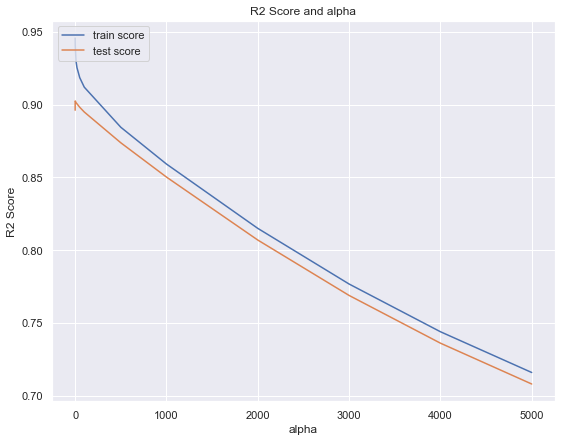

In [96]:
# plotting mean test and train scoes with alpha 
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=[9,7])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observation 
- We can see in the graph that alpha>1 the slope of off train and test score is almost parallel

### Final Ridge Model

In [97]:
# Initialize Alpha=1
alpha = 1
# Create Ridge Model
ridge = Ridge(alpha=alpha)
# Fit the model        
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [98]:
feature_df_r = pd.DataFrame({"features":X_train.columns,"coef": np.abs(ridge.coef_)})
feature_df_r_sorted = feature_df_r[feature_df_r.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop("index",axis=1)
feature_df_r_sorted

,features,coef
0,MSZoning_FV,0.635363
1,Exterior1st_BrkComm,0.600413
2,MSZoning_RH,0.580726
3,MSZoning_RL,0.518275
4,MSZoning_RM,0.468048
...,...,...
152,Exterior2nd_VinylSd,0.000731
153,Age_since_garage_built,0.000715
154,MSSubClass_80,0.000290
155,Age_since_built,0.000268


### Observation 
- Finally Features is around 157
- We can see, as expected, the ridge model has returned more features than lasso. Hence we can say that for our dataset, Lasso has performed well and has created simpler model

## Top Features using Ridge

In [99]:
feature_df_r_sorted.head(5)

,features,coef
0,MSZoning_FV,0.635363
1,Exterior1st_BrkComm,0.600413
2,MSZoning_RH,0.580726
3,MSZoning_RL,0.518275
4,MSZoning_RM,0.468048


### Top features 
- We can see that top 5 features that contribute to sale price of Houses are
    1. MSZoning_FV	       0.635363
        - general zoning classification of the sale with Floating Village Residential
    2. Exterior1st_BrkComm	       0.600413
        - Exterior covering on house made of Common Brick   
    3. MSZoning_RH	       0.580726
        - general zoning classification of the sale with Residential High Density
    4. MSZoning_RL	0.518275
        - general zoning classification of the sale with Residential Low Density
    5. MSZoning_RM	0.468048
        - general zoning classification of the sale with Residential Medium Density

# Model Evaluation
### Prediction 

In [100]:
y_train_pred_r = ridge.predict(X_train)
y_test_pred_r = ridge.predict(X_test)

### Actual vs Predicted in test

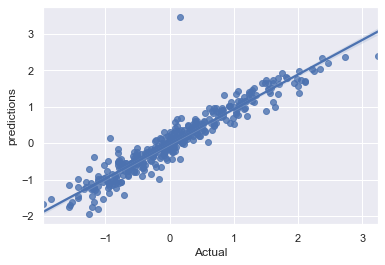

In [101]:
sns.regplot(y_test,y_test_pred_r)
plt.xlabel("Actual")
plt.ylabel("predictions")
plt.show()

### Observation
- We can see that train is linearly related to test predictions, hence we can say that most of the predictions were correct

### Variation covered by Model in test set

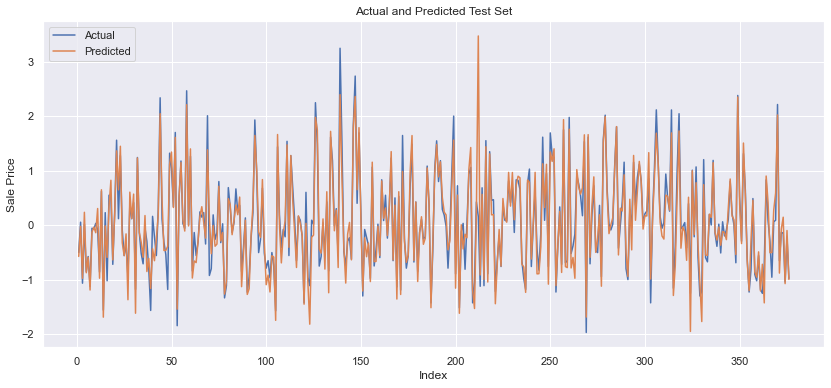

In [102]:
# Intitialize array with 1-max 
c = [i for i in range(1,y_test_pred_r.shape[0]+1,1)]
plt.figure(figsize=[14,6])
# Plot actual values
plt.plot(c,np.array(y_test),label='Actual')
# Plot predicted values
plt.plot(c,np.array(y_test_pred_r),label='Predicted')
# indicate the legends 
plt.legend(loc="upper left")
plt.title('Actual and Predicted Test Set')
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.show()

### Observation
the Model was able to explain most of the variations in the model

## R2 Score
### R2 Score on Train Set

In [103]:
R2_train_r=round(r2_score(y_train,y_train_pred_r),2)
R2_train_r

0.94

### R2 Score on Test Set

In [104]:
R2_test_r = round(r2_score(y_test,y_test_pred_r),2)
R2_test_r

0.89

### Observation
<div class="alert alert-block alert-success">We see that accuracy on train set and test set are very close(difference of 5). Hence are our model hasn't overfitted and has fitted properly</div> 

## Mean Square Error

In [105]:
# Mean Square Error of train set
mse_train = mean_squared_error(y_train, y_train_pred_r)
round(mse_train,2)

0.06

In [106]:
# Mean Square Error of test set
mse_test = mean_squared_error(y_test, y_test_pred_r)
round(mse_test,2)

0.09

### Observation
- we can see that mean square of both train and test is less

-------

# Subjective Questions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Doubling Alpha for lasso

In [107]:
# Initialize Alpha
# Double Alpha
alpha = 0.003*2
# Creat Lasso Object
lasso = Lasso(alpha=alpha)
# Fit the lasso object to X Train        
lasso.fit(X_train, y_train)
# Create Features Dataframe
feature_df_l = pd.DataFrame({"features":X_train.columns,"coef": np.abs(lasso.coef_)})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_l = feature_df_l[feature_df_l.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
feature_df_sorted_l.head(5)

,features,coef
0,GrLivArea,0.302199
1,OverallQual,0.238810
2,OverallCond,0.141083
3,SaleType_New,0.141054
4,TotalBsmtSF,0.124500


In [108]:
# Old Alpha Value
feature_df_sorted.head(5)

,features,coef
0,GrLivArea,0.305019
1,SaleType_New,0.232141
2,OverallQual,0.221789
3,Neighborhood_Crawfor,0.183899
4,Neighborhood_BrkSide,0.165537


In [109]:
print("Number of features Before change",feature_df_sorted.shape[0])
print("Number of features After change",feature_df_sorted_l.shape[0])

Number of features Before change 58
Number of features After change 43


In [110]:
# Predictions
y_train_pred_l1 = lasso.predict(X_train)
y_test_pred_l1 = lasso.predict(X_test)
# R2 Score
R2_train_l1 = round(r2_score(y_train,y_train_pred_l1),2)
R2_test_l1 = round(r2_score(y_test,y_test_pred_l1),2)

print("train R2 score before change",round(r2_train_l,2))
print("train R2 score after change",round(R2_train_l1,2))
print("test R2 score before change",round(r2_test_l,2))
print("test R2 score after change",round(R2_test_l1,2))

train R2 score before change 0.92
train R2 score after change 0.91
test R2 score before change 0.89
test R2 score after change 0.88


### Answer
1. For the first part of the question, the optimal value for alpha for lasso regression is 0.003. And for Ridge Regression model is 1. 
2. After Doubling Alpha in Lasso,the top 5 features list changes , as well as r2 score and MSE. Also the coefficients value have reduced but not drastically, hence making the model even simpler.
3. The Top Most feature remains the same GrLivArea but other features Changed in Lasso.
4. Number of features have also reduced in total

### Doubling Alpha for Ridge

In [111]:
# Initialize Alpha=1
alpha = 1*2
# Create Ridge Model
ridge = Ridge(alpha=alpha)
# Fit the model        
ridge.fit(X_train, y_train)
# Create Features Dataframe
feature_df_r_new = pd.DataFrame({"features":X_train.columns,"coef": np.abs(lasso.coef_)})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_r_new = feature_df_r_new[feature_df_r_new.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
feature_df_sorted_r_new.head(10)

,features,coef
0,GrLivArea,0.302199
1,OverallQual,0.238810
2,OverallCond,0.141083
3,SaleType_New,0.141054
4,TotalBsmtSF,0.124500
5,LotArea,0.088892
6,Neighborhood_BrkSide,0.083729
7,BsmtFinSF1,0.076675
8,Neighborhood_Crawfor,0.070253
9,GarageCars,0.061827


In [112]:
# Old Ridge Model's Top Features
feature_df_r_sorted.head(10)

,features,coef
0,MSZoning_FV,0.635363
1,Exterior1st_BrkComm,0.600413
2,MSZoning_RH,0.580726
3,MSZoning_RL,0.518275
4,MSZoning_RM,0.468048
5,Exterior1st_BrkFace,0.353760
6,SaleCondition_AdjLand,0.322780
7,Foundation_Wood,0.309163
8,Neighborhood_MeadowV,0.276407
9,Neighborhood_StoneBr,0.271823


In [113]:
print("Number of features Before change",feature_df_r_sorted.shape[0])
print("Number of features After change",feature_df_sorted_r_new.shape[0])

Number of features Before change 157
Number of features After change 43


In [114]:
# Predictions
y_train_pred_r1 = ridge.predict(X_train)
y_test_pred_r1 = ridge.predict(X_test)
# R2 Score
R2_train_r1 = round(r2_score(y_train,y_train_pred_r1),2)
R2_test_r1 = round(r2_score(y_test,y_test_pred_r1),2)

print("train R2 score before change",round(R2_train_r,2))
print("train R2 score after change",round(R2_train_r1,2))
print("test R2 score before change",round(R2_test_r,2))
print("test R2 score after change",round(R2_test_r1,2))

train R2 score before change 0.94
train R2 score after change 0.94
test R2 score before change 0.89
test R2 score after change 0.89


### Answer
1. After Doubling Alpha in Ridge,the top 5 features list remains the same but order changes. 
2. The r2 score of train reduces by small amount. Also the coefficients value have reduced, hence making the model even simpler.

### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why? 

### Answer
1. I prefer to use Lasso as it was able to reduce number of features unlike Ridge, hence making the model simple to read

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [115]:
# Drop top 5 features from X train and X_test
X_train.drop(feature_df_sorted.head(5)['features'].values,axis=1,inplace=True)
X_test.drop(feature_df_sorted.head(5)['features'].values,axis=1,inplace=True)

In [116]:
# Initialize Lasso Object
lasso_model = Lasso()

# Initialize Alpha/Lambda values
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
  ]}

# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as R2 Score as its easy to read
scoring_method = 'r2'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=lasso_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1)

# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.186932,0.013405,0.007627,0.000251,0.0001,{'alpha': 0.0001},0.888265,0.872658,0.886224,0.880868,0.911414,0.887885,0.012943,5,0.937957,0.938679,0.939537,0.940313,0.935547,0.938407,0.001635
1,0.172105,0.006735,0.007602,0.000352,0.0002,{'alpha': 0.0002},0.891636,0.885945,0.883182,0.880123,0.915143,0.891206,0.012554,4,0.936593,0.936858,0.938048,0.938745,0.933898,0.936829,0.001661
2,0.171352,0.009571,0.008611,0.001458,0.0003,{'alpha': 0.0003},0.894257,0.890448,0.880252,0.880172,0.916073,0.892240,0.013150,2,0.935000,0.935048,0.936248,0.937407,0.931703,0.935081,0.001908
3,0.166114,0.007894,0.007331,0.000279,0.0004,{'alpha': 0.0004},0.895621,0.892608,0.877160,0.881648,0.915407,0.892489,0.013323,1,0.933614,0.933395,0.934799,0.935909,0.929826,0.933509,0.002050
4,0.170428,0.006882,0.007495,0.000372,0.0005,{'alpha': 0.0005},0.896144,0.894059,0.873584,0.882661,0.914117,0.892113,0.013688,3,0.932243,0.931653,0.933252,0.934472,0.927926,0.931909,0.002210
5,0.159360,0.009049,0.007481,0.000167,0.001,{'alpha': 0.001},0.894617,0.893044,0.863275,0.880007,0.902974,0.886783,0.013866,6,0.924001,0.921663,0.925815,0.926774,0.917756,0.923202,0.003233
6,0.151233,0.005270,0.007376,0.000411,0.002,{'alpha': 0.002},0.896829,0.883772,0.859351,0.873710,0.901332,0.882999,0.015320,7,0.912227,0.912634,0.916122,0.914257,0.908619,0.912772,0.002490
7,0.126948,0.048350,0.007609,0.000249,0.003,{'alpha': 0.003},0.897282,0.877683,0.857220,0.869133,0.899085,0.880081,0.016157,8,0.906218,0.907991,0.911452,0.909188,0.903782,0.907726,0.002605
8,0.130583,0.056629,0.007770,0.000485,0.004,{'alpha': 0.004},0.895233,0.870868,0.854916,0.863973,0.895954,0.876189,0.016634,9,0.901064,0.902783,0.907097,0.904378,0.898573,0.902779,0.002893
9,0.127279,0.055469,0.007747,0.000306,0.005,{'alpha': 0.005},0.893655,0.865426,0.854623,0.860372,0.894118,0.873639,0.016883,10,0.896253,0.898287,0.903088,0.900372,0.894005,0.898401,0.003156


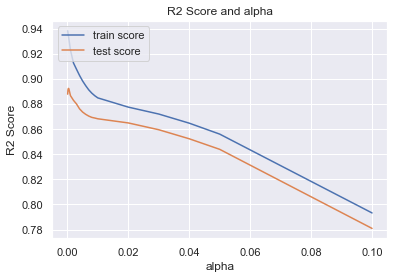

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
# Initialize Alpha
# Double Alpha
alpha = 0.0004
# Creat Lasso Object
lasso = Lasso(alpha=alpha)
# Fit the lasso object to X Train        
lasso.fit(X_train, y_train)
# Create Features Dataframe
feature_df_l_new = pd.DataFrame({"features":X_train.columns,"coef": np.abs(lasso.coef_)})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_l_new = feature_df_l_new[feature_df_l_new.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
feature_df_sorted_l_new.head(5)

,features,coef
0,MSZoning_RH,1.143217
1,MSZoning_FV,1.129752
2,MSZoning_RL,0.996377
3,Exterior1st_BrkComm,0.962257
4,MSZoning_RM,0.929526


### Answer 
- Top Features after removing the top 5 features from previous models
    1. MSZoning_RH
    2. MSZoning_FV
    3. MSZoning_RL
    4. Exterior1st_BrkComm
    5. MSZoning_RM

------------

# Extra
- Here we applied RFE to eliminate variables and reduce feature list to 20 , but it turned out the accuracy of model decreased. Hence this Approach is not that good for out dataset

## RFE 
Lets Apply Recursive feature elimination to reduce features list and then apply Lasso

In [119]:
# instantiate Linear Regression Model
linear_model = LinearRegression()
# Fit the model
X_train_rfe = X_train
linear_model.fit(X_train_rfe,y_train)
# instantiate RFE
rfe = RFE(linear_model,10)
# Fit the Model
rfe.fit(X_train,y_train)
rfe_df = pd.DataFrame(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_),columns=['Variable Name','Related','Rank'])
rfe_df[rfe_df.Related].reset_index().drop("index",axis=1)

,Variable Name,Related,Rank
0,1stFlrSF,True,1
1,MSSubClass_30,True,1
2,MSSubClass_60,True,1
3,MSSubClass_90,True,1
4,MSZoning_FV,True,1
5,MSZoning_RH,True,1
6,MSZoning_RL,True,1
7,MSZoning_RM,True,1
8,Exterior1st_BrkComm,True,1
9,GarageType_CarPort,True,1


In [120]:
related_columns = rfe_df[rfe_df.Related]['Variable Name'].values.tolist()
related_columns

['1stFlrSF',
 'MSSubClass_30',
 'MSSubClass_60',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Exterior1st_BrkComm',
 'GarageType_CarPort']

# Lasso Regularization

In [121]:
# Initialize Lasso Object
lasso_model = Lasso()

# Initialize Alpha/Lambda values
#params = {'alpha':np.arange(0.01,0.2,0.01)}
params = {'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
  ]}

# Initialize cross validation folds
folds = 5

# Initialize Scoring method
scoring_method = 'r2'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=lasso_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1)
# Fit the Model
model_cv.fit(X_train[related_columns],y_train)
# Check the Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009270,0.000744,0.004616,0.000225,0.0001,{'alpha': 0.0001},0.721978,0.646753,0.748766,0.654545,0.714127,0.697234,0.039809,1,0.710540,0.718176,0.704399,0.724916,0.711728,0.713952,0.007013
1,0.008348,0.001596,0.005263,0.000781,0.001,{'alpha': 0.001},0.719784,0.639851,0.740986,0.642715,0.711558,0.690979,0.041707,2,0.706747,0.713541,0.700182,0.720542,0.706069,0.709416,0.006991
2,0.007896,0.001051,0.005187,0.001459,0.002,{'alpha': 0.002},0.716486,0.623423,0.726337,0.634702,0.696943,0.679578,0.042467,3,0.695268,0.704617,0.687514,0.709891,0.693186,0.698095,0.008071
3,0.007668,0.000421,0.005042,0.000548,0.003,{'alpha': 0.003},0.715520,0.617818,0.723842,0.633907,0.688747,0.675967,0.042826,4,0.684329,0.699934,0.680687,0.698674,0.683804,0.689485,0.008123
4,0.006452,0.000972,0.004902,0.000879,0.004,{'alpha': 0.004},0.715514,0.615966,0.724106,0.631411,0.686852,0.674770,0.043768,5,0.673330,0.696717,0.672632,0.689896,0.677375,0.681990,0.009626
5,0.006277,0.000755,0.004360,0.000530,0.005,{'alpha': 0.005},0.715064,0.613821,0.724088,0.629459,0.685435,0.673573,0.044565,6,0.670222,0.693780,0.669931,0.688897,0.676220,0.679810,0.009800
6,0.007024,0.000615,0.005645,0.002318,0.006,{'alpha': 0.006},0.714524,0.611298,0.723844,0.627202,0.683795,0.672133,0.045446,7,0.669040,0.692563,0.668728,0.687677,0.674938,0.678589,0.009794
7,0.006038,0.000614,0.004422,0.000873,0.007,{'alpha': 0.007},0.713801,0.608551,0.723348,0.624645,0.681933,0.670456,0.046344,8,0.667643,0.691125,0.667305,0.686234,0.673422,0.677146,0.009788
8,0.007015,0.000509,0.004589,0.000420,0.008,{'alpha': 0.008},0.712896,0.605590,0.722601,0.621903,0.679654,0.668529,0.047225,9,0.666031,0.689468,0.665664,0.684593,0.671603,0.675472,0.009791
9,0.011620,0.003491,0.007417,0.002153,0.009,{'alpha': 0.009},0.711806,0.603170,0.721600,0.619425,0.674886,0.666177,0.047718,10,0.664205,0.687795,0.663804,0.682851,0.668836,0.673498,0.009939


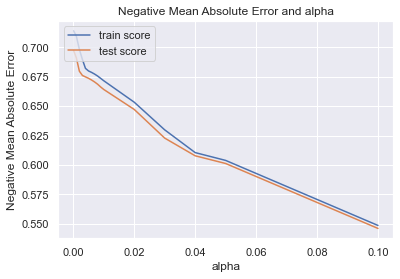

In [122]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
# Without rfe
#alpha = 0.01 

# With RFE
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[related_columns], y_train)

Lasso(alpha=0.001)

In [124]:
feature_df = pd.DataFrame({"features":related_columns,"coef": np.abs(lasso.coef_)})
feature_df_sorted = feature_df[feature_df.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
feature_df_sorted

,features,coef
0,Exterior1st_BrkComm,1.941273
1,MSZoning_FV,1.694372
2,GarageType_CarPort,1.177605
3,MSSubClass_60,1.071183
4,MSZoning_RL,1.056646
5,MSZoning_RM,0.984611
6,MSZoning_RH,0.964349
7,MSSubClass_30,0.792138
8,1stFlrSF,0.666804
9,MSSubClass_90,0.609980


## Top 10 Features

In [125]:
feature_df_sorted.head(10)

,features,coef
0,Exterior1st_BrkComm,1.941273
1,MSZoning_FV,1.694372
2,GarageType_CarPort,1.177605
3,MSSubClass_60,1.071183
4,MSZoning_RL,1.056646
5,MSZoning_RM,0.984611
6,MSZoning_RH,0.964349
7,MSSubClass_30,0.792138
8,1stFlrSF,0.666804
9,MSSubClass_90,0.609980


In [126]:
y_train_pred = lasso.predict(X_train[related_columns])
y_test_pred = lasso.predict(X_test[related_columns])

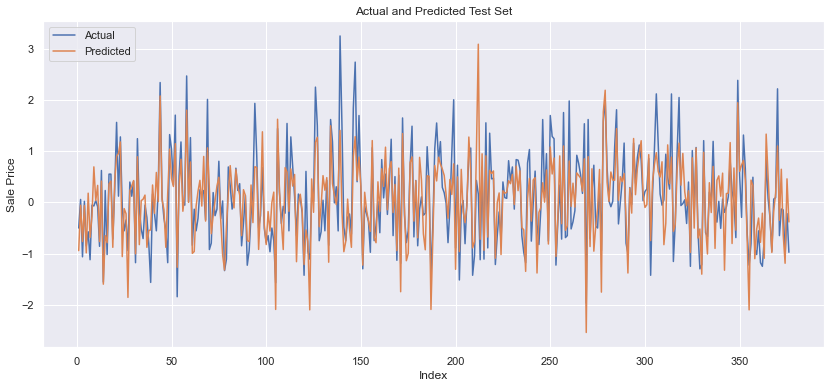

In [127]:
# Intitialize array with 1-max 
c = [i for i in range(1,y_test.shape[0]+1,1)]
plt.figure(figsize=[14,6])
# Plot actual values
plt.plot(c,np.array(y_test),label='Actual')
# Plot predicted values
plt.plot(c,np.array(y_test_pred),label='Predicted')
# indicate the legends 
plt.legend(loc="upper left")
plt.title('Actual and Predicted Test Set')
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.show()